In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importing dataset through kaggle API
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/rajathmc/cornell-moviedialog-corpus")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaarunaykaushal
Your Kaggle Key: ··········


100%|██████████| 9.58M/9.58M [00:00<00:00, 66.4MB/s]

In [3]:
#converting dataset to dataframe
char_meta = pandas.read_csv('/content/cornell-moviedialog-corpus/movie_characters_metadata.txt', sep='\+\+\+\$\+\+\+', header=None, names=['speaker_ID1','speaker','movie_ID','movie_name','gender','pos_in_credits'], encoding= 'unicode_escape')
movie_convo = pandas.read_csv('/content/cornell-moviedialog-corpus/movie_conversations.txt', sep='\+\+\+\$\+\+\+', header=None, names=['speaker_ID1','speaker_ID2','movie_ID','DialogueID_list'], encoding= 'unicode_escape')
movie_lines = pandas.read_csv('/content/cornell-moviedialog-corpus/movie_lines.txt', sep='\+\+\+\$\+\+\+', header=None, names=['Dialogue_ID','speaker_ID1','movie_ID','speaker','Dialogue'], encoding= 'unicode_escape')
movie_titles_meta = pandas.read_csv('/content/cornell-moviedialog-corpus/movie_titles_metadata.txt', sep='\+\+\+\$\+\+\+', header=None, names=['movie_ID','movie_name','year','rating','no_of_votes','list_of_genres'], encoding= 'unicode_escape')
script_url = pandas.read_csv('/content/cornell-moviedialog-corpus/raw_script_urls.txt', sep='\+\+\+\$\+\+\+', header=None, names=['movie_ID','movie_name','url'], encoding= 'unicode_escape')

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
#remove leading and trailing whitespaces
char_meta['movie_ID'] = char_meta['movie_ID'].apply(str.strip)
movie_convo['movie_ID'] = movie_convo['movie_ID'].apply(str.strip)
movie_lines['movie_ID'] = movie_lines['movie_ID'].apply(str.strip)
movie_titles_meta['movie_ID'] = movie_titles_meta['movie_ID'].apply(str.strip)
script_url['movie_ID'] = script_url['movie_ID'].apply(str.strip)


In [5]:
# number of entries in the dataframes
movie_lines.shape, movie_titles_meta.shape, script_url.shape, char_meta.shape, movie_convo.shape

((304713, 5), (617, 6), (617, 3), (9035, 6), (83097, 4))

In [6]:
#function to sort dataframe z by column name a
import numpy as np
from natsort import index_natsorted

def sortDataframeBy(a, z):
  z = z.sort_values(
  
   by = a,

   key=lambda x: np.argsort(index_natsorted(z[a]))
    
)

In [7]:
#sort movie_convo by DialogueID_list
sortDataframeBy('DialogueID_list', movie_convo)

In [8]:
#sort movie_lines by Dialogue_ID
sortDataframeBy('movie_ID', movie_lines)

#Plotting frequency of occurences of genres to check how the data has been sampled

In [9]:
#store column values of lis_of_genres column in a list for iteration 
genre_string_list = []
genre_string_list = movie_titles_meta["list_of_genres"].values.tolist()


In [10]:
#replacing anomalies from the genre_string_list column
genre_list = []
for index in range(len(genre_string_list)):
      row = genre_string_list[index].replace('" ',"").replace('"',"").replace("'", '').replace("[","").replace("]","").strip()
      genre_list.append(row.split(", "))
print(genre_list)

[['comedy', 'romance'], ['adventure', 'biography', 'drama', 'history'], ['action', 'crime', 'drama', 'thriller'], ['adventure', 'mystery', 'sci-fi'], ['action', 'comedy', 'crime', 'drama', 'thriller'], ['action', 'adventure', 'romance', 'sci-fi', 'thriller'], ['crime', 'mystery', 'thriller'], ['fantasy', 'horror', 'thriller'], ['fantasy', 'horror', 'thriller'], ['sci-fi', 'thriller'], ['drama', 'mystery', 'thriller'], ['action', 'drama', 'thriller'], ['comedy', 'romance', 'sci-fi'], ['comedy', 'romance'], ['crime', 'drama', 'sci-fi', 'thriller'], ['action', 'sci-fi', 'thriller'], ['biography', 'drama', 'music'], ['horror', 'romance'], ['drama'], ['action', 'western'], ['drama', 'thriller'], ['drama', 'thriller'], ['action', 'adventure', 'comedy', 'crime'], ['action', 'adventure', 'thriller'], ['comedy', 'romance'], ['action', 'crime', 'drama', 'mystery', 'thriller'], ['crime', 'drama'], ['comedy', 'drama', 'music'], ['drama', 'romance', 'war'], ['crime', 'drama', 'mystery', 'thriller']

In [11]:
#flatten list of lists to a single list flat_list_genre
flat_list_genre = [item for sublist in genre_list for item in sublist]


In [12]:
unique_values = list(set(flat_list_genre))
unique_values.remove('')


In [13]:
#getting count of every genre in the dataset and storing in dictionary
from collections import Counter
count_genre = dict(Counter(flat_list_genre))
#return count_genre


In [14]:
#sorting the dictionary 
sorted_count_genre = sorted(count_genre.items(), key=lambda x: x[1])
#sorted_count_genre

In [16]:
print(sum(count_genre.values()))

1872


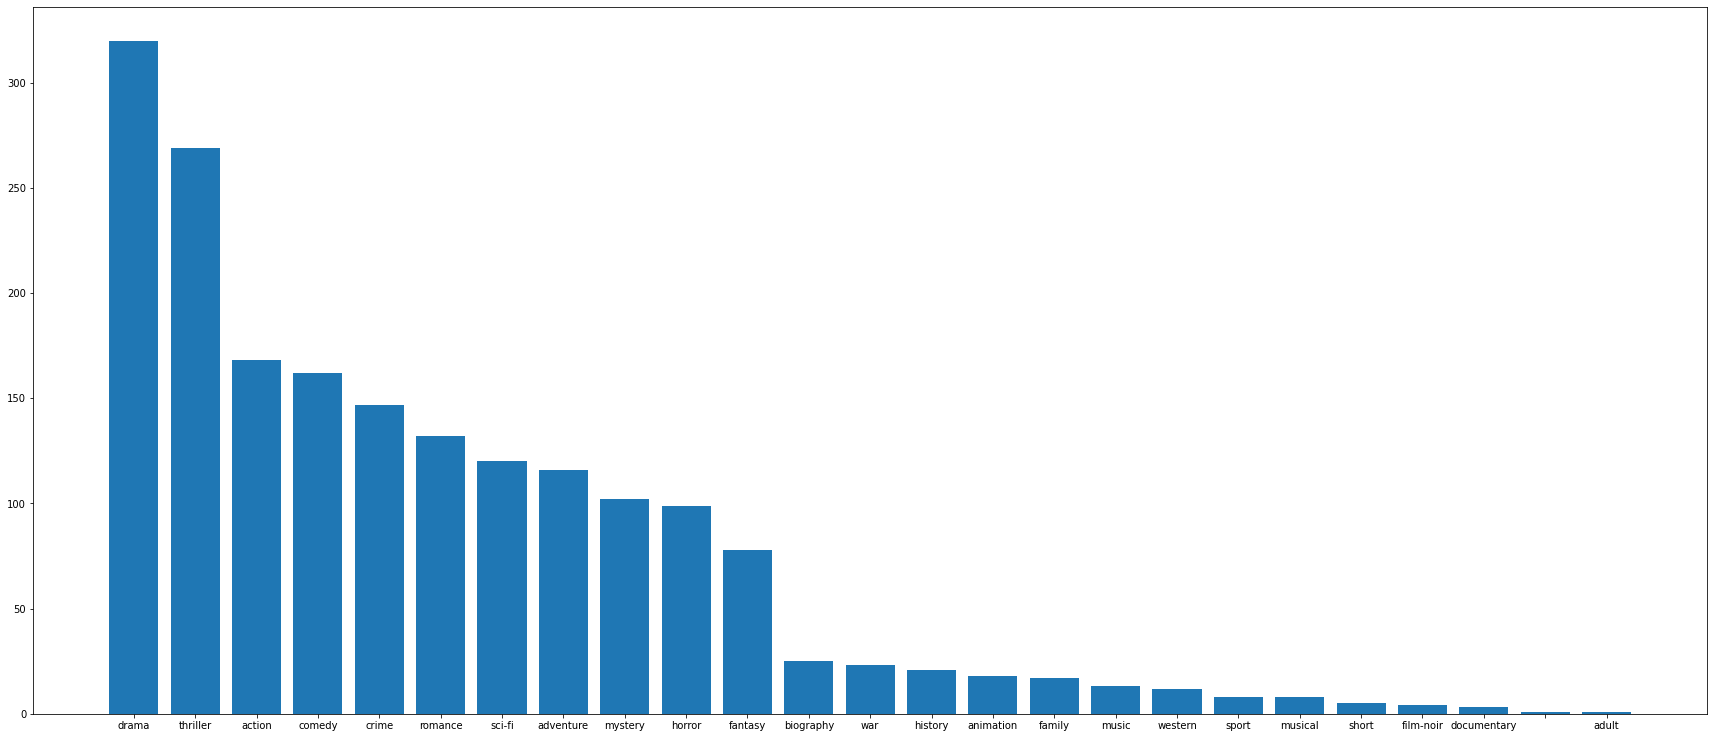

In [17]:
#plotting
import matplotlib.pyplot as plt

# sort a dictionary by value and plot the key-value pairs in reverse order
sorted_items = sorted(count_genre.items(), key=lambda x: x[1])
keys, values = zip(*sorted_items)  # unpack the key-value pairs into separate lists

fig = plt.figure(figsize=(30, 13))
plt.bar(keys[::-1], values[::-1])
plt.show()




*   drama, thriller,action, comedy, crime, romance, sci-fi, adventure, mystery, horror,  genres seem to have the most occurences (make up a significant percentage of all movies in dataset)(around 90%)


#Frequency of genres occurring together to check how the data has been sampled

In [18]:
#dictionary of genres with count
count_of_genre_together = {x:genre_string_list.count(x) for x in genre_string_list}

#sorting dict in descending order and converting to list(dont know why sorted() does that)
count_of_genre_together = sorted(count_of_genre_together.items(), key=lambda x: x[1], reverse=True)
#converting back to dictionary
count_of_genre_together = dict(count_of_genre_together)


type(count_of_genre_together)

dict

In [19]:
{k: round((v*100)/(617),2) for k, v in sorted(count_of_genre_together.items(), key=lambda item: item[1], reverse=True)}

# sum(count_of_genre_together.values())

{" ['drama']": 5.51,
 " ['comedy', 'romance']": 2.76,
 " ['comedy', 'drama', 'romance']": 2.59,
 " ['crime', 'drama', 'thriller']": 2.59,
 " ['drama', 'romance']": 2.43,
 " ['comedy', 'drama']": 2.43,
 " ['action', 'crime', 'drama', 'thriller']": 1.78,
 " ['crime', 'drama']": 1.78,
 " ['action', 'adventure', 'sci-fi', 'thriller']": 1.78,
 " ['comedy']": 1.78,
 " ['horror', 'mystery', 'thriller']": 1.62,
 " ['thriller']": 1.46,
 " ['action', 'adventure', 'thriller']": 1.3,
 " ['crime', 'drama', 'mystery', 'thriller']": 1.3,
 " ['horror']": 1.3,
 " ['horror', 'thriller']": 1.3,
 " ['drama', 'mystery', 'thriller']": 1.13,
 " ['crime', 'mystery', 'thriller']": 0.97,
 " ['drama', 'thriller']": 0.97,
 " ['drama', 'horror', 'thriller']": 0.97,
 " ['action', 'sci-fi', 'thriller']": 0.81,
 " ['crime', 'thriller']": 0.81,
 " ['biography', 'drama']": 0.81,
 " ['drama', 'horror', 'mystery', 'thriller']": 0.81,
 " ['action', 'crime', 'thriller']": 0.81,
 " ['fantasy', 'horror', 'thriller']": 0.65,


In [20]:
# Create a bar plot
names = list(count_of_genre_together.keys())
values = list(count_of_genre_together.values())

#setting labels
fig = plt.figure(figsize=(750, 50))
plt.bar(range(len(count_of_genre_together)), values, tick_label=names)
fig = plt.gcf()
plt.xlabel('X-axis label', fontsize=50)

# Show the plot
plt.show()




*   'drama' genre movies are the most sampled movies in the dataset(make up 5.5% of entire dataset)
*   [comedy, romance], [comedy, drama, romance], [crime, drama, thriller], [drama, romance] genre movies make up  10.3% of entire dataset.
* top five genres occurring together, combined make up about 16% of the dataset



* From the above two genre plots, its clear that the data is skewed and could possibly affect our model's performance

#Frequency of occurrence of words based on hand-selected movies checked for action and comedy for finding patterns 

##Comedy

In [21]:
#function to get a list of strings of dialogues given a list of movie ids
def getDialogueStringListForAmovie(movie_lines, val, column_name):
  comedy_dialogue_string_list = []
  count = 0
  for index in val:
    selected_rows = movie_lines[movie_lines[column_name] == index]
    Dialogue_column_values = selected_rows['Dialogue']
    count += 1
    #Dialogue_column_values
    #Convert the series to a list of strings
    #print("test")
    comedy_dialogue_string_list = comedy_dialogue_string_list + Dialogue_column_values.tolist()
  #print("Total Movies: " + str(count))
  #print(len(comedy_dialogue_string_list))
  return comedy_dialogue_string_list

In [22]:
comedy_dialogue_string_list = []
#list of hand-selected comedy movies
movie_ID_list = ['m12', 'm13', 'm84', 'm131', 'm149','m172', 'm299', 'm327', 'm607', 'm496', 'm497', 'm595', 'm522', 'm600']
#calling function mentioned in above cell to get dialogues for the mentioned movies in movie list
comedy_dialogue_string_list = getDialogueStringListForAmovie(movie_lines, movie_ID_list, 'movie_ID')

In [23]:
#adding all elements of list of strings to single string
comedy_dialogue_string_list_mother = ' '.join([str(elem) for elem in comedy_dialogue_string_list])
comedy_dialogue_string_list_mother

' Commissioner, Aquarius.  Kruger, Sagittarius.  I was asking McCrosky, Commissioner.  Some southern plantation owner falls in love with this poor...  What\'s the story?  I was reading too.  Forget it.  I was reading.  You\'ve made your point, Commissioner. There\'s only one other pilot who can handle that shuttle and that\'s Clarence Oveur.  He\'s got a lunar flight today.  I want him pulled.  Jacobs, pull Oveur!  I told you, leave the boys in Washington to the boys downtown and the boys down...  I wonder how your boys in Washington are going to take this one.  That just doesn\'t make any sense.  That\'s right, Commissioner.  Senselessly murdered just minutes ago.  I just wish it was that simple.  What?  Commissioner.  You handle your front office people, I\'ll handle the press and leave the boys in Washington to the boys downtown and the boys downtown to the boys on the board.  Bud, get wise to the political realities. The boys on the board are under a lot of pressure from the boys d

In [24]:
#string containing invalid chars 
invalid_chars = ".?!,\'"

In [25]:
#function to remove punctuations
def keepValidCharacters(dialogue_string_list):
  # Define the characters to keep

  # Initialize an empty result string
  comedy_dialogue_string_mother_cleansed = ""
  # Iterate through the characters in the string
  for c in dialogue_string_list:
      # If the character is in the valid_chars string, append it to the result
      if c not in invalid_chars:
          comedy_dialogue_string_mother_cleansed += c
  
  return comedy_dialogue_string_mother_cleansed




In [26]:
#calling above function
comedy_dialogue_string_mother_cleansed = keepValidCharacters(comedy_dialogue_string_list_mother)
#comedy_dialogue_string_mother_cleansed

In [27]:
#importing the nltk library along with the required packages for performing tokenisation, pos tagging
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
#function to tokenise and lowercase cleansed dialogue string
def tokeniseAndLowercasse(dialogue_string_cleansed):
  tokens_n0_dialogue = []
  tokens_m0_dialogue = nltk.tokenize.word_tokenize(dialogue_string_cleansed)

  lowercase_tokens_m0_dialogue = [word.lower() for word in tokens_m0_dialogue]

  return lowercase_tokens_m0_dialogue


In [29]:
#call above function
lowercase_tokens_m0_dialogue = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)
type(lowercase_tokens_m0_dialogue)

list

In [30]:
#list of custom stopwords(found on gitub) along with self-written stop words

custom_stopwords = [ "/u", "[" , "]",  "/i", "*", "xxxxxx", "/b", "á", "xk101", "=", "-er", "-ty", "~", "-CC", "uh",  "<", ">", "/n","0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently",

"approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consider", "considering", "contain", "containing", "corresponding", "could", "couldn", "couldnt", 

"couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", 

"everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediately", 

"importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", 

"needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", 
"obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really",

"reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", 

"somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", 

"thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", 

"wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "youll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz", 'ya',
 'yknow',
 'kinda',
 'kobo' , '_died_',
 '-okay',
 '_last',
 '_you_',
 '_owe_',
 '_your_',
 '-in',
 '-et',
 '\x8chood',
 '\x8ctill',
 'yall','youíre',
 'ya''zuzu',
 'à',
 'ça',
 'à',
 'à',
 'à',
 '\x97\x97',
 '\x97\x97',
 '\x97\x97',
 '\x97\x97',
 '-\x97',
 'youve',
 '\x97\x97',
 '\x97\x97',
 '\x97\x97',
 '\x97\x97',
 'win',
 'kgb',
 'yorgi',
 'youve',
 '.',
 ',',
 '/',
 '?',
 '!',
 "'",
 '"'
  ]


In [31]:
#function to remove custom stopwords
def removeCustomStopwords(lowercase_tokens, custom_stopwords):
  mother_lowercase_tokens_m0_dialogue = []
  for index in lowercase_tokens:
        if index not in custom_stopwords:
                mother_lowercase_tokens_m0_dialogue.append(index)

  return mother_lowercase_tokens_m0_dialogue

In [32]:
#call above function
mother_lowercase_tokens_m0_dialogue = removeCustomStopwords(lowercase_tokens_m0_dialogue, custom_stopwords)


In [33]:
#function to perform pos tagging
def posTag(list_of_string):
  tokens_tag = []
  tokens_tag = nltk.pos_tag(list_of_string)
  return tokens_tag

In [ ]:
#calling above function
tokens_tag = posTag(mother_lowercase_tokens_m0_dialogue)


In [35]:
#list defining the tags we want to keep 
pos_tags_to_keep = [ 'NNP', 'NNPS',  'VBG', 'VBD', 'VBN']

In [36]:
#function for pos tags to keep
def keepPosTags(tuple_list, tagsToKeep):
  # Use a list comprehension to keep only the words with POS tags that are not in the list of tags to remove
  filtered_words = [word for (word, pos) in tuple_list if pos  in tagsToKeep]
  return filtered_words

In [37]:
#call above function
filtered_words = keepPosTags(tokens_tag, pos_tags_to_keep)

In [38]:
#creating frequency distribution for cleansed dialogue string
from nltk.probability import FreqDist
freq_distribution_comedy = FreqDist(filtered_words)
print(dict(sorted(freq_distribution_comedy.items(), key=lambda item: item[1], reverse=True)))

{'talking': 62, 'fucking': 61, 'happened': 52, 'thought': 50, 'told': 46, 'ted': 41, 'left': 37, 'wanted': 37, 'darling': 34, 'coming': 34, 'working': 33, 'called': 30, 'met': 28, 'married': 22, 'supposed': 22, 'thinking': 22, 'making': 21, 'asked': 21, 'shit': 21, 'lost': 20, 'wedding': 18, 'died': 18, 'telling': 18, 'caught': 18, 'calling': 17, 'hit': 16, 'harold': 16, 'shut': 15, 'knew': 15, 'started': 15, 'playing': 15, 'killed': 15, 'set': 14, 'waiting': 14, 'flying': 14, 'kidding': 14, 'running': 13, 'hurt': 13, '\x96': 13, 'sing': 12, 'walking': 12, 'bring': 11, 'brought': 10, 'closed': 10, 'wearing': 10, 'sold': 10, 'paid': 10, 'leaving': 9, 'interesting': 9, 'fighting': 9, 'heard': 9, 'worked': 9, 'missed': 9, 'screw': 9, 'king': 9, 'built': 9, 'evening': 9, 'broke': 9, 'holding': 9, 'fuck': 9, 'reading': 8, 'played': 8, 'stopped': 8, 'locked': 8, 'keeping': 8, 'driving': 8, 'talked': 8, 'putting': 8, 'staring': 8, 'saved': 8, 'ring': 8, 'named': 8, 'screaming': 8, 'lying': 8,

In [39]:
#plotting the freq. distribution 
import matplotlib.pyplot as plt
plt.figure(figsize=(900, 30))  # the size you want
plt.tick_params(axis='both', which='major', labelsize=15) # setting label size  

freq_distribution_comedy.plot() 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)




*   curse words and street words have a relatively higher frequency of occurence
* slang words(informal abbreviated english in particular) have v low frequency


All in all, patterns at word level being found. More thorough filters needed(maybe add other word classes, hand pick select words to remove from the distribution?Could be time consuming).



##Action

In [40]:
#initialse empty list
action_dialogue_string_list = []
#list of hand-selected comedy movies
movie_ID_list_action = ['m11', 'm15', 'm23', 'm39', 'm58','m67', 'm195', 'm333', 'm259', 'm496', 'm468', 'm321', 'm614', 'm175']
#calling function mentioned in above cell to get dialogues for the mentioned movies in movie list
action_dialogue_string_list = getDialogueStringListForAmovie(movie_lines, movie_ID_list_action, 'movie_ID')

In [41]:
#adding all elements of list of strings to single string
action_dialogue_string_list_mother = ' '.join([str(elem) for elem in action_dialogue_string_list])


In [42]:
#calling above function
action_dialogue_string_mother_cleansed = keepValidCharacters(action_dialogue_string_list_mother)


In [43]:
#call above function
lowercase_tokens_dialogue_action = tokeniseAndLowercasse(action_dialogue_string_mother_cleansed)


In [44]:
#call above function
mother_lowercase_tokens_dialogue_action = removeCustomStopwords(lowercase_tokens_dialogue_action, custom_stopwords)


In [45]:
#calling above function
tokens_tag = posTag(mother_lowercase_tokens_dialogue_action)


In [46]:
#call above function
filtered_words = keepPosTags(tokens_tag, pos_tags_to_keep)


In [47]:
#printing freq dist by converting to dictionary and sorting 
freq_distribution_comedy = FreqDist(filtered_words)
print(dict(sorted(freq_distribution_comedy.items(), key=lambda item: item[1], reverse=True)))

{'killed': 45, 'thought': 45, 'left': 44, 'talking': 44, 'wanted': 38, 'told': 37, 'coming': 32, 'happened': 31, 'working': 28, 'asked': 24, 'called': 24, 'knew': 23, 'making': 19, 'calling': 18, 'feeling': 17, 'thinking': 17, 'started': 15, 'felt': 13, 'met': 12, 'running': 12, 'playing': 12, 'supposed': 12, 'turned': 12, 'waiting': 11, 'married': 11, 'lost': 11, 'lying': 11, 'needed': 11, 'set': 10, 'helped': 10, 'worked': 10, 'looked': 10, 'died': 9, 'telling': 9, 'tired': 8, 'flying': 8, 'fucking': 8, 'brought': 8, 'leaving': 8, 'bring': 8, 'involved': 8, 'moving': 8, 'darling': 8, 'hiding': 8, 'kidding': 8, 'cut': 7, 'killing': 7, 'shit': 7, 'happening': 7, 'hoping': 7, 'decided': 7, 'changed': 7, 'lied': 7, 'discovered': 7, 'heading': 6, 'fuck': 6, 'heard': 6, 'turning': 6, 'caught': 6, 'shut': 6, 'sitting': 6, 'walked': 6, 'believed': 6, 'ruined': 6, 'held': 6, 'zavitz': 6, 'answering': 5, 'wrote': 5, 'checked': 5, 'learned': 5, 'expected': 5, 'trained': 5, 'secured': 5, 'readin

In [48]:
#words like killing, screwed , fleeing are somewhat exclusvie to these action movies

#### there are words exclusive to certain genres(see above for comedy and action), meaning using a feature such as bag of words can be useful

#Checking word frequency distribution of a genre by selecting movies whose list of genres have that genre in them

In [49]:
#making an interim dictionary that stores movie IDs and their genres
interim_dict = movie_titles_meta.set_index('movie_ID').to_dict()['list_of_genres']
#interim_dict

In [50]:
#function to remove whitespaces in a dictionary
def remove_whitespace_from_keys(dictionary):
    new_dictionary = {}
    for key, value in dictionary.items():
        new_key = key.strip()
        new_dictionary[new_key] = value
    return new_dictionary


In [51]:
#call above function 
movieID_listOfGenres_dict = remove_whitespace_from_keys(interim_dict)


##Action

In [52]:
#list comprehension which selects keys whose values have the string genre in them
def keySelect(dictionary, genre):
  selected_keys = {}
  selected_keys = {key: value for key, value in dictionary.items() if genre in value}
  return selected_keys



In [53]:
action_movieIDs = keySelect(movieID_listOfGenres_dict, 'action')
#action_movieIDs

In [54]:
#function to store all keys in a list
def keysToList(dictionary):
  list_of_keys = []
  for keys, values in dictionary.items():
      list_of_keys.append(keys)
  return list_of_keys

In [55]:
#call above function
list_keys_movieIDS_action = keysToList(action_movieIDs)


In [56]:
#calling function written before to get a list of dialogues for a list of movie IDs
string_list_dialogues_movieIDs_action = getDialogueStringListForAmovie(movie_lines, list_keys_movieIDS_action, 'movie_ID')


In [57]:
#convert to a single string
movieIDs_action_dialogues_string_list_mother = ' '.join([str(elem) for elem in string_list_dialogues_movieIDs_action])


In [58]:
#calling function to remove invalid characters from the dialogues
comedy_dialogue_string_mother_cleansed = keepValidCharacters(movieIDs_action_dialogues_string_list_mother)


In [59]:
#calling function to tokeise and lowercase the string
dialogues_movieIDs_tokens_lowercase_action = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)

In [60]:
#calling function to remove custom stopwords
mother_dialogues_movieIDs_tokens_lowercase_action = removeCustomStopwords(dialogues_movieIDs_tokens_lowercase_action, custom_stopwords)

In [61]:
#function to perform pos tagging
movieIDs_tokens_tags_action = posTag(mother_dialogues_movieIDs_tokens_lowercase_action)


In [62]:
#function to keep only select pos tags present in pos_tags_to_keep
filtered_words = keepPosTags(movieIDs_tokens_tags_action, pos_tags_to_keep)


In [63]:
#making frequency distribution of the filtered tokens 
freq_distribution_movieIDs_action = FreqDist(filtered_words)
print(freq_distribution_movieIDs_action.most_common())

[('thought', 438), ('killed', 398), ('told', 377), ('talking', 366), ('left', 348), ('happened', 327), ('coming', 318), ('wanted', 310), ('knew', 242), ('fucking', 236), ('working', 223), ('lost', 210), ('called', 205), ('shit', 197), ('supposed', 196), ('set', 162), ('running', 153), ('waiting', 149), ('thinking', 145), ('asked', 144), ('hit', 141), ('telling', 127), ('died', 120), ('making', 119), ('met', 111), ('hurt', 109), ('leaving', 108), ('started', 102), ('moving', 100), ('figured', 92), ('shut', 90), ('killing', 88), ('needed', 86), ('turned', 86), ('scared', 85), ('calling', 84), ('worked', 83), ('brought', 80), ('living', 80), ('king', 78), ('looked', 76), ('alright', 75), ('kidding', 75), ('happening', 74), ('changed', 73), ('saved', 72), ('feeling', 70), ('bring', 68), ('married', 68), ('cut', 67), ('playing', 67), ('felt', 67), ('straight', 64), ('involved', 64), ('fighting', 64), ('lived', 63), ('tired', 61), ('sitting', 59), ('fuck', 59), ('paid', 58), ('watching', 57)

In [64]:
#plotting graph for a different view
import matplotlib.pyplot as plt
plt.figure(figsize=(900, 30))  # the size you want
plt.tick_params(axis='both', which='major', labelsize=15) # setting label size  

freq_distribution_movieIDs_action.plot() 


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


* killed, kicking, gambling, taped, luck, spying are the middle freq words(9-12) for this genre

##drama

In [65]:
#list comprehension which selects keys whose values have the string genre in them
def keySelect(dictionary, genre):
  selected_keys = {}
  selected_keys = {key: value for key, value in dictionary.items() if genre in value}
  return selected_keys


action_movieIDs = keySelect(movieID_listOfGenres_dict, 'drama')
action_movieIDs


#function to store all keys in a list
def keysToList(dictionary):
  list_of_keys = []
  for keys, values in dictionary.items():
      list_of_keys.append(keys)
  return list_of_keys


  #call above function
list_keys_movieIDS_action = keysToList(action_movieIDs)
list_keys_movieIDS_action

#calling function written before to get a list of dialogues for a list of movie IDs
string_list_dialogues_movieIDs_action = getDialogueStringListForAmovie(movie_lines, list_keys_movieIDS_action, 'movie_ID')






#convert to a single string
movieIDs_action_dialogues_string_list_mother = ' '.join([str(elem) for elem in string_list_dialogues_movieIDs_action])


#calling function to remove invalid characters from the dialogues
comedy_dialogue_string_mother_cleansed = keepValidCharacters(movieIDs_action_dialogues_string_list_mother)


#calling function to tokenise and lowercase the string
dialogues_movieIDs_tokens_lowercase_action = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)


#calling function to remove custom stopwords
mother_dialogues_movieIDs_tokens_lowercase_action = removeCustomStopwords(dialogues_movieIDs_tokens_lowercase_action, custom_stopwords)


#function to perform pos tagging
movieIDs_tokens_tags_action = posTag(mother_dialogues_movieIDs_tokens_lowercase_action)


#function to keep only select pos tags present in pos_tags_to_keep
filtered_words = keepPosTags(movieIDs_tokens_tags_action, pos_tags_to_keep)


#making frequency distribution of the filtered tokens 
freq_distribution_movieIDs_drama = FreqDist(filtered_words)





In [66]:
print(freq_distribution_movieIDs_drama.most_common())

[('told', 1500), ('thought', 1387), ('talking', 1149), ('happened', 1021), ('wanted', 1006), ('fucking', 847), ('left', 804), ('coming', 793), ('called', 751), ('killed', 711), ('knew', 613), ('supposed', 514), ('lost', 509), ('working', 489), ('asked', 475), ('thinking', 474), ('making', 434), ('telling', 417), ('shit', 411), ('met', 407), ('married', 407), ('waiting', 360), ('started', 353), ('set', 343), ('hit', 339), ('died', 304), ('rose', 301), ('hurt', 290), ('running', 287), ('looked', 261), ('scared', 260), ('worked', 252), ('calling', 248), ('brought', 240), ('leaving', 238), ('bed', 234), ('talked', 231), ('paid', 215), ('tired', 215), ('loved', 212), ('kidding', 206), ('fuck', 204), ('felt', 201), ('playing', 196), ('living', 196), ('feeling', 195), ('changed', 193), ('turned', 191), ('wrote', 190), ('sitting', 186), ('fucked', 182), ('shut', 181), ('bought', 179), ('heard', 179), ('happening', 177), ('needed', 176), ('alright', 175), ('stopped', 172), ('king', 170), ('lyin

* suffering, screamed, shaking, emotional, betrayed, cheated are the middle freq words(9-13) for this genre

##Biography

In [67]:
action_movieIDs = keySelect(movieID_listOfGenres_dict, 'biography')
action_movieIDs




#call above function
list_keys_movieIDS_action = keysToList(action_movieIDs)
list_keys_movieIDS_action


#calling function written before to get a list of dialogues for a list of movie IDs
string_list_dialogues_movieIDs_action = getDialogueStringListForAmovie(movie_lines, list_keys_movieIDS_action, 'movie_ID')






#convert to a single string
movieIDs_action_dialogues_string_list_mother = ' '.join([str(elem) for elem in string_list_dialogues_movieIDs_action])



#calling function to remove invalid characters from the dialogues
comedy_dialogue_string_mother_cleansed = keepValidCharacters(movieIDs_action_dialogues_string_list_mother)



#calling function to tokenise and lowercase the string
dialogues_movieIDs_tokens_lowercase_action = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)



#calling function to remove custom stopwords
mother_dialogues_movieIDs_tokens_lowercase_action = removeCustomStopwords(dialogues_movieIDs_tokens_lowercase_action, custom_stopwords)



#function to perform pos tagging
movieIDs_tokens_tags_action = posTag(mother_dialogues_movieIDs_tokens_lowercase_action)



#function to keep only select pos tags present in pos_tags_to_keep
filtered_words = keepPosTags(movieIDs_tokens_tags_action, pos_tags_to_keep)



#making frequency distribution of the filtered tokens 
freq_distribution_movieIDs_biography = FreqDist(filtered_words)




In [68]:
print(freq_distribution_movieIDs_biography.most_common())

[('told', 134), ('thought', 95), ('talking', 92), ('wanted', 84), ('fucking', 79), ('called', 64), ('coming', 60), ('knew', 55), ('left', 53), ('lost', 52), ('happened', 51), ('asked', 50), ('telling', 48), ('working', 47), ('met', 43), ('making', 41), ('killed', 39), ('supposed', 39), ('shit', 39), ('set', 35), ('thinking', 33), ('married', 33), ('fuck', 31), ('started', 27), ('fucked', 26), ('waiting', 25), ('running', 25), ('calling', 24), ('talked', 24), ('fighting', 23), ('playing', 23), ('loved', 23), ('scared', 23), ('died', 22), ('killing', 22), ('worked', 22), ('paid', 22), ('heard', 21), ('leaving', 19), ('tired', 19), ('brought', 19), ('writing', 19), ('sitting', 19), ('turned', 19), ('fired', 19), ('\x96', 19), ('bring', 18), ('changed', 18), ('hurt', 17), ('shut', 17), ('broke', 17), ('putting', 17), ('hit', 17), ('finished', 16), ('looked', 16), ('painting', 16), ('king', 15), ('filled', 15), ('lying', 15), ('sold', 15), ('bed', 15), ('promised', 15), ('bought', 15), ('in

##War

In [69]:
action_movieIDs = keySelect(movieID_listOfGenres_dict, 'war')
action_movieIDs




#call above function
list_keys_movieIDS_action = keysToList(action_movieIDs)
list_keys_movieIDS_action


#calling function written before to get a list of dialogues for a list of movie IDs
string_list_dialogues_movieIDs_action = getDialogueStringListForAmovie(movie_lines, list_keys_movieIDS_action, 'movie_ID')





#convert to a single string
movieIDs_action_dialogues_string_list_mother = ' '.join([str(elem) for elem in string_list_dialogues_movieIDs_action])


#calling function to remove invalid characters from the dialogues
comedy_dialogue_string_mother_cleansed = keepValidCharacters(movieIDs_action_dialogues_string_list_mother)

#calling function to tokenise and lowercase the string
dialogues_movieIDs_tokens_lowercase_action = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)

#calling function to remove custom stopwords
mother_dialogues_movieIDs_tokens_lowercase_action = removeCustomStopwords(dialogues_movieIDs_tokens_lowercase_action, custom_stopwords)

#function to perform pos tagging
movieIDs_tokens_tags_action = posTag(mother_dialogues_movieIDs_tokens_lowercase_action)

#function to keep only select pos tags present in pos_tags_to_keep
filtered_words = keepPosTags(movieIDs_tokens_tags_action, pos_tags_to_keep)

#making frequency distribution of the filtered tokens 
freq_distribution_movieIDs_war = FreqDist(filtered_words)




In [70]:
print(freq_distribution_movieIDs_war.most_common())

[('told', 71), ('thought', 69), ('killed', 58), ('left', 57), ('coming', 47), ('fucking', 46), ('happened', 43), ('king', 41), ('talking', 40), ('called', 36), ('knew', 36), ('asked', 35), ('wanted', 35), ('making', 31), ('lost', 30), ('waiting', 29), ('thinking', 26), ('playing', 26), ('fighting', 23), ('telling', 23), ('supposed', 23), ('shit', 22), ('hit', 20), ('working', 20), ('held', 20), ('brought', 19), ('married', 19), ('dying', 19), ('saved', 19), ('running', 19), ('heard', 19), ('met', 18), ('cut', 18), ('started', 17), ('died', 16), ('knowing', 16), ('loved', 16), ('bring', 15), ('leaving', 15), ('played', 14), ('promised', 13), ('worked', 13), ('suffering', 13), ('fight', 13), ('\x96', 13), ('set', 12), ('darling', 12), ('staying', 12), ('needed', 12), ('expected', 12), ('moving', 12), ('putting', 12), ('killing', 12), ('alright', 12), ('figured', 12), ('scared', 12), ('goddamned', 12), ('born', 11), ('allowed', 11), ('evening', 11), ('lay', 11), ('bed', 11), ('sending', 1

* fight, darling, goddamned, buried, pulled are the middle freq words(8-13) for this genre

##fantasy

In [71]:
action_movieIDs = keySelect(movieID_listOfGenres_dict, 'fantasy')
action_movieIDs




#call above function
list_keys_movieIDS_action = keysToList(action_movieIDs)
list_keys_movieIDS_action



#calling function written before to get a list of dialogues for a list of movie IDs
string_list_dialogues_movieIDs_action = getDialogueStringListForAmovie(movie_lines, list_keys_movieIDS_action, 'movie_ID')






#convert to a single string
movieIDs_action_dialogues_string_list_mother = ' '.join([str(elem) for elem in string_list_dialogues_movieIDs_action])




#calling function to remove invalid characters from the dialogues
comedy_dialogue_string_mother_cleansed = keepValidCharacters(movieIDs_action_dialogues_string_list_mother)


#calling function to tokenise and lowercase the string
dialogues_movieIDs_tokens_lowercase_action = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)


#calling function to remove custom stopwords
mother_dialogues_movieIDs_tokens_lowercase_action = removeCustomStopwords(dialogues_movieIDs_tokens_lowercase_action, custom_stopwords)


#function to perform pos tagging
movieIDs_tokens_tags_action = posTag(mother_dialogues_movieIDs_tokens_lowercase_action)


#function to keep only select pos tags present in pos_tags_to_keep
filtered_words = keepPosTags(movieIDs_tokens_tags_action, pos_tags_to_keep)

#making frequency distribution of the filtered tokens 
freq_distribution_movieIDs_fantasy = FreqDist(filtered_words)




In [72]:
print(freq_distribution_movieIDs_fantasy.most_common())

[('thought', 210), ('told', 173), ('left', 171), ('happened', 170), ('talking', 162), ('coming', 156), ('killed', 138), ('wanted', 130), ('knew', 100), ('called', 96), ('lost', 89), ('working', 79), ('died', 77), ('waiting', 74), ('thinking', 67), ('met', 67), ('supposed', 66), ('making', 62), ('telling', 61), ('scared', 53), ('set', 53), ('darling', 53), ('living', 51), ('running', 50), ('king', 50), ('feeling', 48), ('asked', 47), ('fucking', 46), ('brought', 44), ('ring', 44), ('loved', 43), ('looked', 43), ('hurt', 42), ('started', 41), ('killing', 40), ('turned', 38), ('moving', 38), ('married', 37), ('lived', 37), ('bring', 36), ('calling', 36), ('hit', 36), ('changed', 36), ('happening', 35), ('bed', 35), ('felt', 34), ('born', 34), ('stopped', 33), ('drew', 33), ('saved', 32), ('worked', 32), ('kidding', 31), ('read', 31), ('leaving', 30), ('promised', 30), ('tonight', 29), ('figured', 29), ('lying', 29), ('named', 28), ('starting', 28), ('finished', 28), ('talked', 28), ('tire

* words like dreaming, sing, charming, wicked, hunting,honored are the middle freq words(8-12) for this genre

##sci-fi

In [73]:
action_movieIDs = keySelect(movieID_listOfGenres_dict, 'sci-fi')
action_movieIDs




#call above function
list_keys_movieIDS_action = keysToList(action_movieIDs)
list_keys_movieIDS_action


#calling function written before to get a list of dialogues for a list of movie IDs
string_list_dialogues_movieIDs_action = getDialogueStringListForAmovie(movie_lines, list_keys_movieIDS_action, 'movie_ID')






#convert to a single string
movieIDs_action_dialogues_string_list_mother = ' '.join([str(elem) for elem in string_list_dialogues_movieIDs_action])



#calling function to remove invalid characters from the dialogues
comedy_dialogue_string_mother_cleansed = keepValidCharacters(movieIDs_action_dialogues_string_list_mother)

#calling function to tokenise and lowercase the string
dialogues_movieIDs_tokens_lowercase_action = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)


#calling function to remove custom stopwords
mother_dialogues_movieIDs_tokens_lowercase_action = removeCustomStopwords(dialogues_movieIDs_tokens_lowercase_action, custom_stopwords)

#function to perform pos tagging
movieIDs_tokens_tags_action = posTag(mother_dialogues_movieIDs_tokens_lowercase_action)

#function to keep only select pos tags present in pos_tags_to_keep
filtered_words = keepPosTags(movieIDs_tokens_tags_action, pos_tags_to_keep)

#making frequency distribution of the filtered tokens 
freq_distribution_movieIDs_scifi = FreqDist(filtered_words)




In [74]:
print(freq_distribution_movieIDs_scifi.most_common())

[('happened', 303), ('told', 292), ('thought', 291), ('talking', 236), ('coming', 229), ('left', 228), ('wanted', 189), ('killed', 178), ('lost', 149), ('working', 146), ('called', 140), ('knew', 140), ('supposed', 123), ('fucking', 117), ('running', 108), ('set', 107), ('telling', 101), ('thinking', 99), ('asked', 96), ('died', 88), ('making', 77), ('leaving', 75), ('happening', 74), ('moving', 74), ('shit', 73), ('hit', 69), ('waiting', 68), ('started', 68), ('met', 67), ('turned', 62), ('shut', 58), ('brought', 58), ('hurt', 58), ('scared', 58), ('missing', 58), ('feeling', 56), ('looked', 55), ('felt', 55), ('changed', 54), ('living', 54), ('stopped', 54), ('needed', 53), ('figured', 48), ('killing', 48), ('cut', 48), ('worked', 47), ('ted', 45), ('built', 45), ('calling', 45), ('involved', 42), ('tired', 42), ('created', 42), ('watching', 41), ('kidding', 41), ('reading', 40), ('married', 40), ('bring', 40), ('lying', 39), ('caught', 38), ('saved', 38), ('lived', 38), ('loved', 37

* words like confirmedm reported, planned, checking, testing, freezingare the middle freq words(10-14) for this genre

#plot for verb and noun occurences v genre

In [75]:
entire_list_genres = list(unique_values)
#entire_list_genres.remove('')

In [76]:
#different function to perform pos tagging
def posTag_x(list_of_string):
  tokens_tag = []
  tokens_tag = dict(nltk.pos_tag(list_of_string))
  return tokens_tag

In [77]:
pos_tags_to_keep1 = [  'NNP', 'NNPS',  'VBG', 'VBD', 'VBN']

In [78]:
from collections import Counter
# list of nouns and verbs to keep
verbs_to_keep = ['VBG', 'VBD', 'VBN', 'VBP', 'VB', 'VBZ']
nouns_to_keep = ['NNP', 'NNPS', 'NN', 'NNS']

In [79]:
mother_noun_dict = {}
mother_verb_dict = {}

for index in entire_list_genres:

        
        movieIDs1 = keySelect(movieID_listOfGenres_dict, index)

        list_keys_movieIDs1 = keysToList(movieIDs1)

        #calling function written before to get a list of dialogues for a list of movie IDs in list_keys_movieIDs1
        string_list_dialogues_movieIDs1 = getDialogueStringListForAmovie(movie_lines, list_keys_movieIDs1, 'movie_ID')

        #convert to a single string
        movieIDs_action_dialogues_string_list1 = ' '.join([str(elem) for elem in string_list_dialogues_movieIDs1])

        #calling function to remove invalid characters from the dialogues
        dialogue_string_mother_cleansed1 = keepValidCharacters(movieIDs_action_dialogues_string_list1)

        #calling function to tokenise and lowercase the string
        dialogues_movieIDs_tokens_lowercase1 = tokeniseAndLowercasse(dialogue_string_mother_cleansed1)


        #calling different function to perform pos tagging
        movieIDs_tokens_tags1 = posTag_x(dialogues_movieIDs_tokens_lowercase1)


        #below code calculates verb and noun count by checking the pos tag of words and storing them in a dictionary along with genre name
        total_tag_count = Counter(movieIDs_tokens_tags1.values())

        count_noun = 0
        count_verb = 0
        for key, value in total_tag_count.items():
          if key in verbs_to_keep:
            count_verb += value
          elif key in nouns_to_keep:
            count_noun += value


        mother_noun_dict.update({index: count_noun})
        mother_verb_dict.update({index: count_verb})

        
        

        

In [80]:
#normalising verb and noun count by dividing by total movies of that genre 

for i in entire_list_genres:

    action_movieIDs2 = keySelect(movieID_listOfGenres_dict, i)
    list_keys_movieIDS_action2 = keysToList(action_movieIDs2)
    #print(list_keys_movieIDS_action2)

    total_count = 0
    for index in list_keys_movieIDS_action2:
        count = movie_lines['movie_ID'].value_counts()[index]
        total_count = total_count + count
    

    mother_verb_dict[i] = mother_verb_dict[i] / total_count
    mother_noun_dict[i] = mother_verb_dict[i] / total_count

    

In [81]:
# Sort the dictionary by values in descending order
sorted_verb_dict = dict(sorted(mother_verb_dict.items(), key=lambda item: item[1], reverse=True))

# Extract the keys and values from the sorted dictionary
keys = list(sorted_verb_dict.keys())
values = list(sorted_verb_dict.values())

# Set the figure size and font size
plt.figure(figsize=(40, 10))
plt.rcParams.update({'font.size': 15})

# Plot the dictionary using Matplotlib
plt.bar(keys, values)

# Add a title and axis labels
plt.title('My Dictionary')
plt.xlabel('Key')
plt.ylabel('Value')

plt.show()

* plot shows a considerable difference in verb/(number of dialogues for that genre) for adult, short, documentary as compared to the the other genres

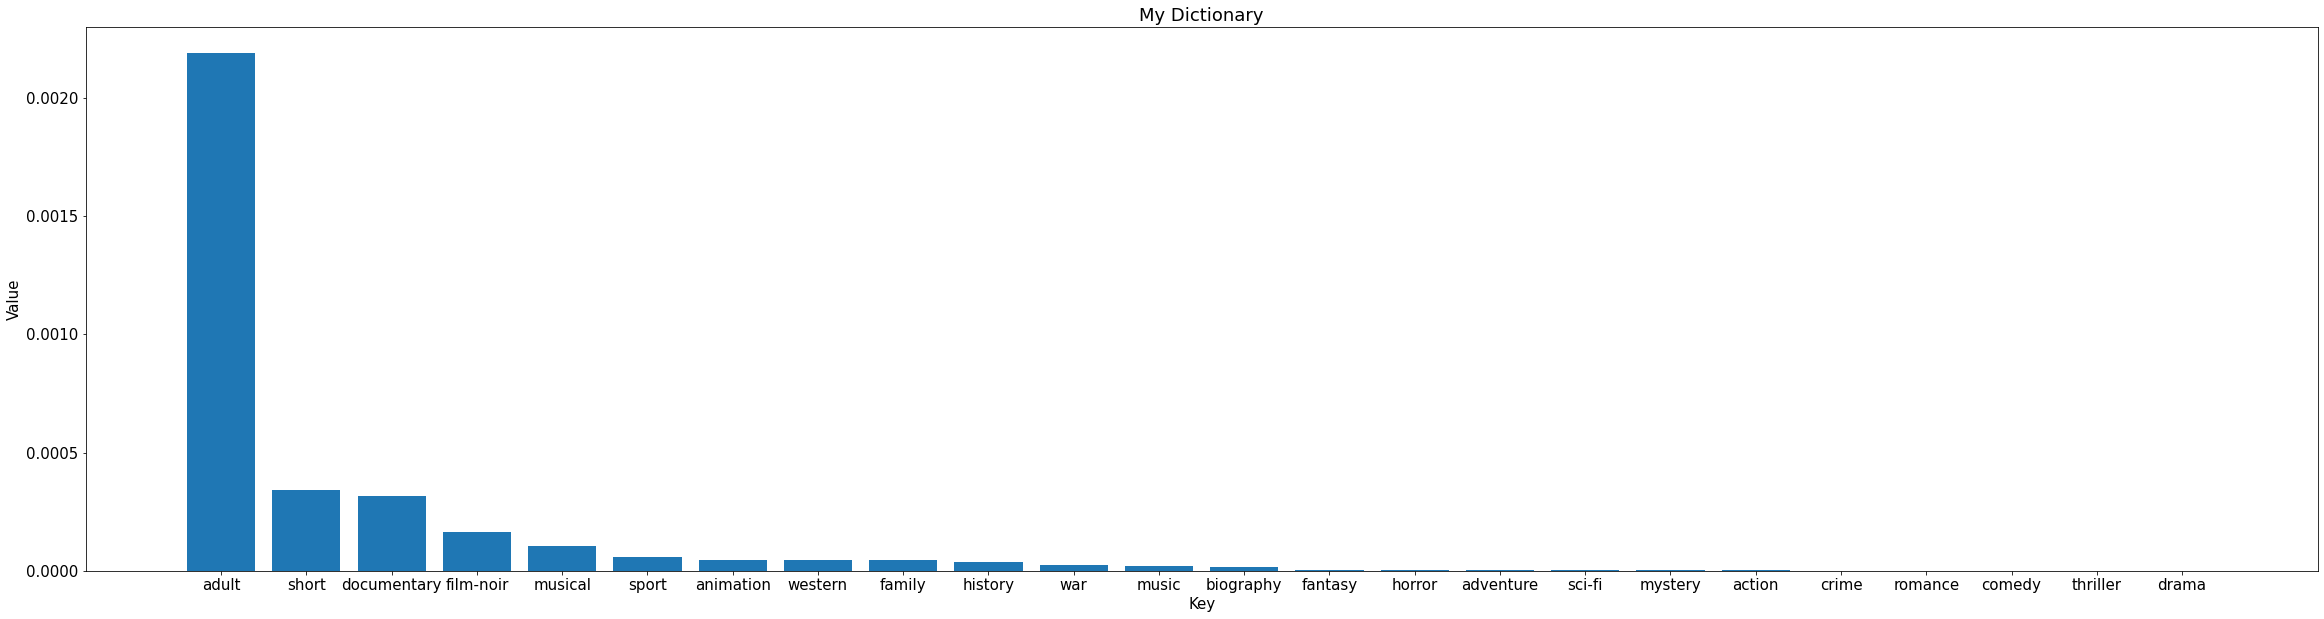

In [82]:
# Sort the dictionary by values in descending order
sorted_noun_dict = dict(sorted(mother_noun_dict.items(), key=lambda item: item[1], reverse=True))

# Extract the keys and values from the sorted dictionary
keys = list(sorted_noun_dict.keys())
values = list(sorted_noun_dict.values())

# Set the figure size and font size
plt.figure(figsize=(40, 10))
plt.rcParams.update({'font.size': 15})

# Plot the dictionary using Matplotlib
plt.bar(keys, values)

# Add a title and axis labels
plt.title('My Dictionary')
plt.xlabel('Key')
plt.ylabel('Value')

plt.show()

* plot shows a massive difference in noun/(number of dialogues for that genre) for adult as compared to the the other genres



* Evaluation - noun and verb count could be useful in predicting the label(can be used as feature)




# plotting year of release vs genre

In [83]:
col = movie_titles_meta['year']

# Use the replace function to remove the custom characters
col = col.replace({'/I': ''}, regex=True)

# Update the dataframe with the modified column
movie_titles_meta['year_updated'] = col

In [ ]:
from collections import Counter

count = Counter(movie_titles_meta['year_updated'])
sorted_dict = sorted(count.items(), key=lambda x: x[1])


In [ ]:
releaseYear_whitespace = remove_whitespace_from_keys(count)


In [ ]:
movie_IDs_genre = keySelect(movieID_listOfGenres_dict, 'family')


In [87]:
movie_IDs_romance = list(movie_IDs_genre.keys())


In [88]:
# Initialize an empty list to store the release dates
release_dates = []

# Iterate over the movie IDs
for movie_id in movie_IDs_romance:
    # Select the rows that match the movie ID
    rows = movie_titles_meta.loc[movie_titles_meta['movie_ID'] == movie_id]
    
    # Get the first (and only) release date from the rows
    release_date = rows.iloc[0]['year_updated']
    
    # Add the release date to the list
    release_dates.append(release_date)


In [89]:

# Create a list of items
#items = ['apple', 'banana', 'apple', 'cherry', 'banana', 'apple']

# Use the Counter class to count the items
release_date_counts = Counter(release_dates)
print(dict(sorted(release_date_counts.items(), key=lambda x: x[1])))

{' 1998 ': 1, ' 1985 ': 1, ' 1991 ': 1, ' 1988 ': 1, ' 1978 ': 1, ' 1939 ': 1, ' 1994 ': 2, ' 1995 ': 2, ' 1997 ': 2, ' 1993 ': 2, ' 1987 ': 2}


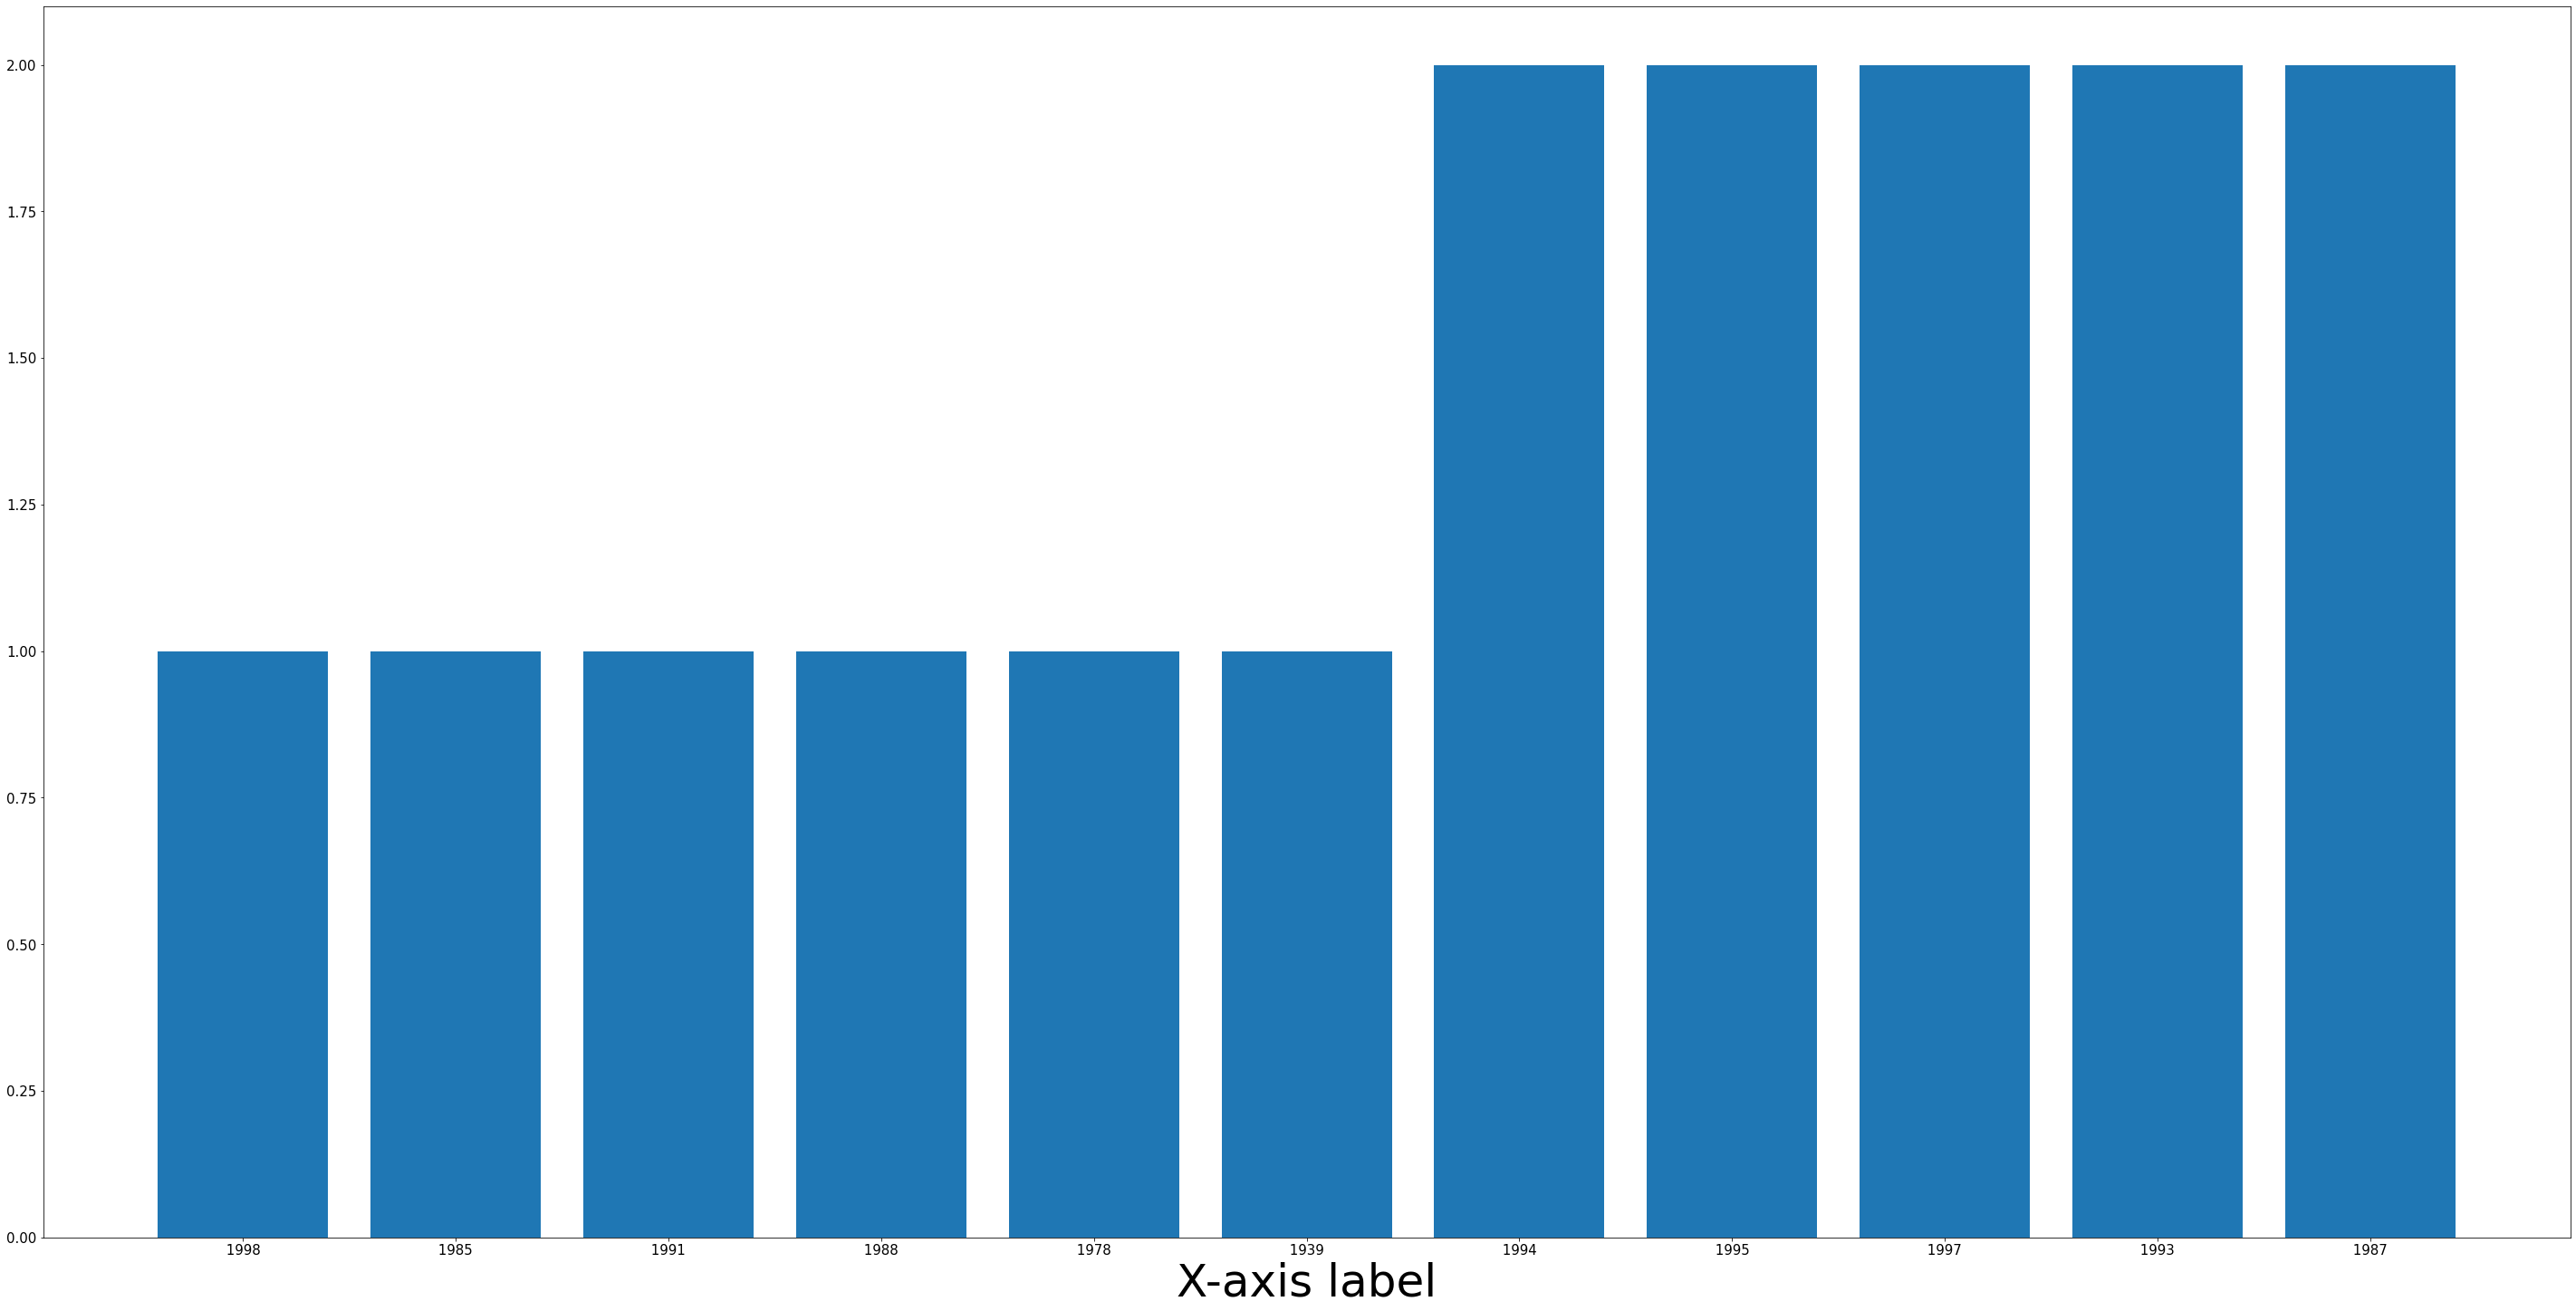

In [90]:
import matplotlib.pyplot as plt

# Dictionary to plot
#d = {'apple': 10, 'banana': 5, 'cherry': 20}

sorted_release_date_counts = dict(sorted(release_date_counts.items(), key=lambda x: x[1]))

# Extract the keys

# Extract the keys and values from the dictionary
keys = list(sorted_release_date_counts.keys())
values = list(sorted_release_date_counts.values())


#size
fig = plt.figure(figsize=(50, 25))
#plt.bar(range(len(sorted_release_date_counts)), values, tick_label=names)
#fig = plt.gcf()
plt.xlabel('X-axis label', fontsize=50)
# Create the bar plot
plt.bar(keys, values)

# Show the plot
plt.show()




* checked year of release to count of movies(for a genre)'s graph for different genres. No pattern found as the count is proportional to the total number of movies that exist for that genre which comes down to the way the data has been sampled. This meas the model will perform well for test set but not for other unseen, new data.

* Conclusion- should not be used as a feature



# Checking other possible features

In [91]:
#sorting dataframe according to movie ID so that there is a 1-to-1 mapping between the features 
sortDataframeBy('movie_ID', movie_titles_meta)

###total number of dialogues for every movie

In [92]:
#initialising dictionary that will store dialogue count for every movie
movie_dialogue_count = {}

# Iterate over the rows of the DataFrame
for index, row in movie_convo.iterrows():
    # Get the string of IDs for the current row
    ids_string = row['DialogueID_list']

    # Get the key and value from the 'key' and 'value' columns
    key = row['movie_ID']
    value = ids_string.count(',') + 1
    
    # If the key is not in the dictionary, add the key-value pair
    if key not in movie_dialogue_count:
        movie_dialogue_count[key] = value
    # If the key is already in the dictionary, append the value to the existing value
    else:
        # Append to the value of the key 
        movie_dialogue_count[key] += value

print(movie_dialogue_count)

{'m0': 669, 'm1': 273, 'm2': 672, 'm3': 272, 'm4': 578, 'm5': 421, 'm6': 584, 'm7': 155, 'm8': 206, 'm9': 212, 'm10': 627, 'm11': 368, 'm12': 291, 'm13': 236, 'm14': 317, 'm15': 359, 'm16': 1007, 'm17': 578, 'm18': 557, 'm19': 669, 'm20': 678, 'm21': 526, 'm22': 483, 'm23': 498, 'm24': 480, 'm25': 576, 'm26': 131, 'm27': 700, 'm28': 338, 'm29': 678, 'm30': 407, 'm31': 359, 'm32': 515, 'm33': 385, 'm34': 494, 'm35': 980, 'm36': 689, 'm37': 501, 'm38': 909, 'm39': 390, 'm40': 281, 'm41': 440, 'm42': 834, 'm43': 400, 'm44': 576, 'm45': 615, 'm46': 490, 'm47': 288, 'm48': 559, 'm49': 359, 'm50': 502, 'm51': 306, 'm52': 321, 'm53': 463, 'm54': 562, 'm55': 828, 'm56': 151, 'm57': 601, 'm58': 450, 'm59': 589, 'm60': 368, 'm61': 361, 'm62': 729, 'm63': 341, 'm64': 233, 'm65': 448, 'm66': 498, 'm67': 305, 'm68': 574, 'm69': 463, 'm70': 746, 'm71': 571, 'm72': 985, 'm73': 291, 'm74': 498, 'm75': 454, 'm76': 377, 'm77': 1014, 'm78': 832, 'm79': 552, 'm80': 261, 'm81': 185, 'm82': 1160, 'm83': 536

In [93]:
#storing dictinary values to list(to be used as feature)
movie_dialogue_count_list = list(movie_dialogue_count.values())


###ratings

In [94]:
#list comprehension which selects keys whose values have the string genre in them
movieID_avgRating_dict = {}
for i in unique_values:
    def keySelect(dictionary, genre):
      selected_keys = {}
      selected_keys = {key: value for key, value in dictionary.items() if genre in value}
      return selected_keys


    _movieIDs = keySelect(movieID_listOfGenres_dict, i)

    filtered_df = movie_titles_meta.loc[movie_titles_meta['movie_ID'].isin(_movieIDs)]

    # Calculate the average rating for the filtered dataframe

    average_rating = filtered_df['rating'].mean()
    
    movieID_avgRating_dict.update({i: average_rating})

    

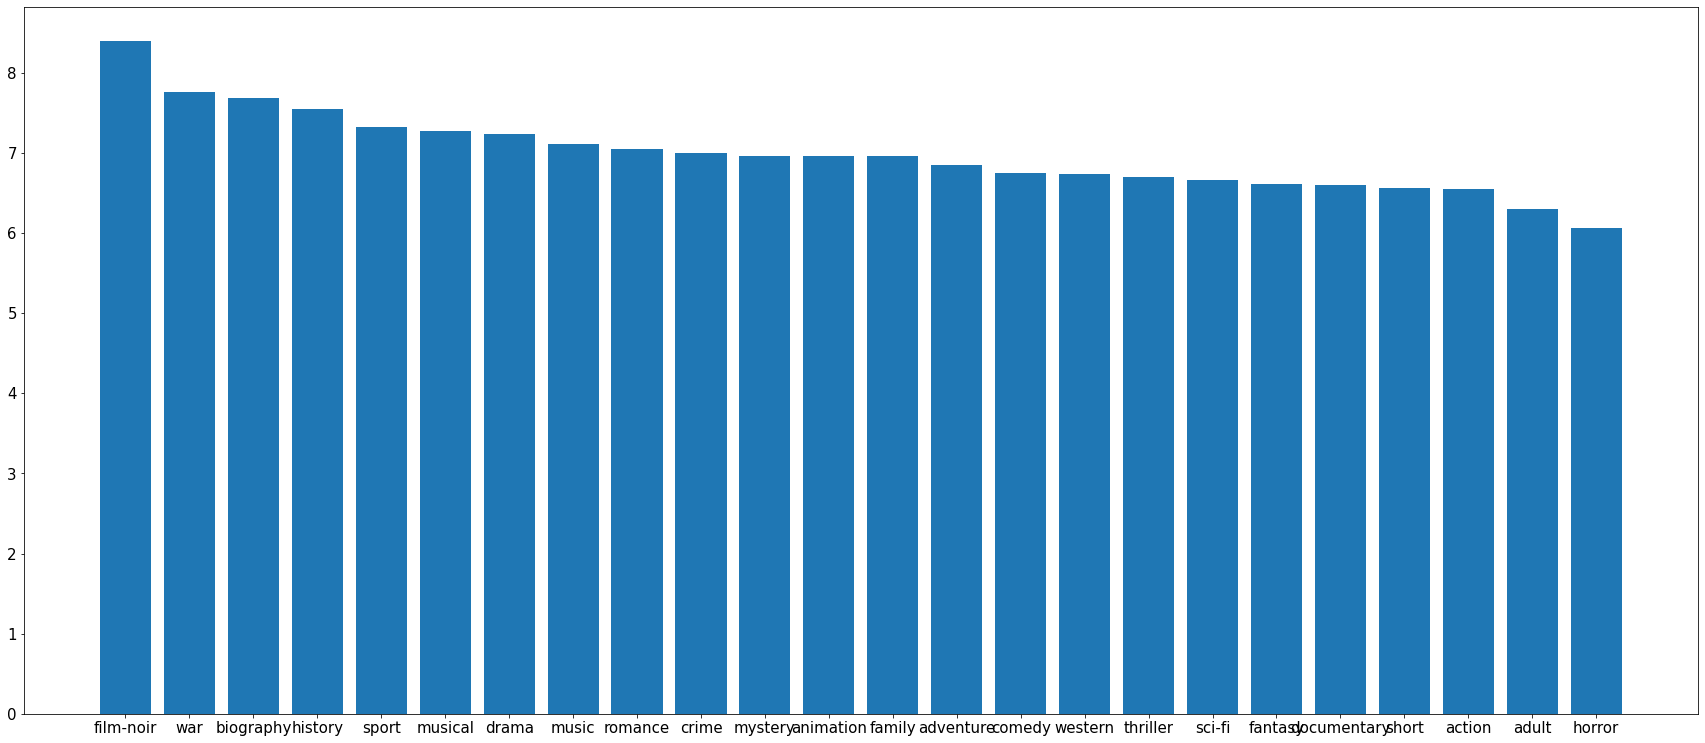

In [95]:
# sort a dictionary by value and plot the key-value pairs in reverse order
# plotting genre v rating bar plot

sorted_items = sorted(movieID_avgRating_dict.items(), key=lambda x: x[1])
keys, values = zip(*sorted_items)  # unpack the key-value pairs into separate lists

fig = plt.figure(figsize=(30, 13))
plt.bar(keys[::-1], values[::-1])
plt.show()


* The distribution of avg rating v genre seemes to be too even and almost the same for every genre
* conclusion- not a relevant feature

###sentiment analysis

In [96]:
from textblob import TextBlob


In [97]:
#putting movie IDs in an iterable list
movie_ID = movie_titles_meta['movie_ID'].tolist()


In [98]:
#intialising dictionary to store genre(key) and avg sentiment of dialogues in that genre(value)
genre_avgSentiment_dict = {}

movieID_avgRating_dict = {}
for i in unique_values:
    

    _movieIDs = keySelect(movieID_listOfGenres_dict, i)


    sentiment = []
    for j in _movieIDs:

        selected_rows = movie_lines[movie_lines['movie_ID'] == j]
        Dialogue_column_values = selected_rows['Dialogue']

        dialogue_string_list = Dialogue_column_values.tolist()


        #converting list of strings to list of lists
        dialogue_list = []
        for index in range(len(dialogue_string_list)):
          row1 = str(dialogue_string_list[index]).replace('"',"").replace("'","").strip()
          dialogue_list.append(row1)
    

        #adding all elements of list of lists to single string
        dialogue_string = ' '.join([str(elem) for elem in dialogue_list])


        
        # Create a TextBlob object from the paragraph
        blob = TextBlob(dialogue_string)

        # Determine the sentiment of the paragraph

        sentiment.append(blob.sentiment.polarity)


    genre_avgSentiment_dict.update({i: sum(sentiment) / len(sentiment)})






    
    

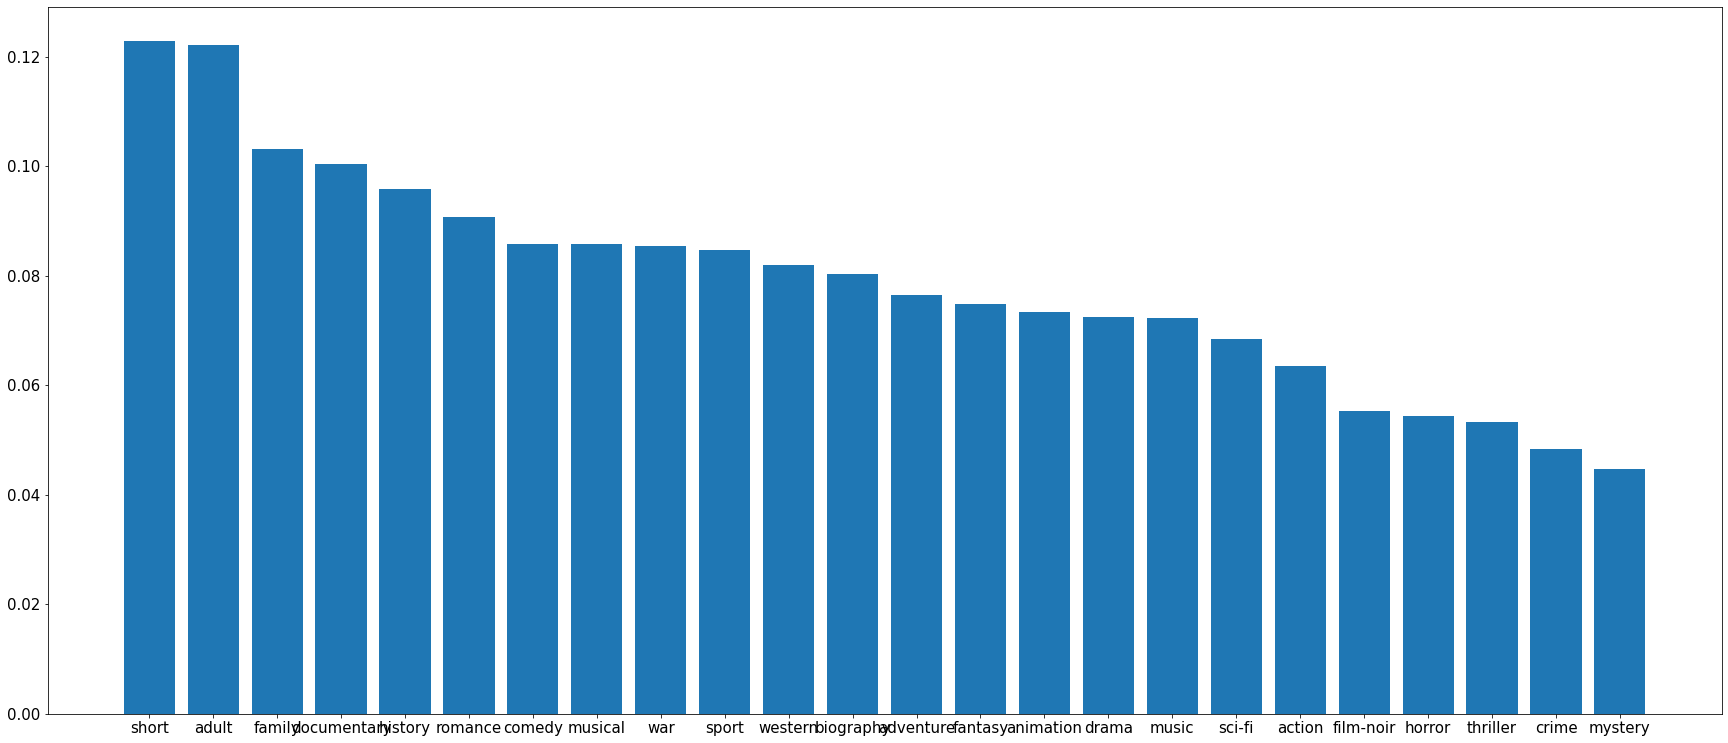

In [99]:
# sort a dictionary by value and plot the key-value pairs in reverse order
sorted_items = sorted(genre_avgSentiment_dict.items(), key=lambda x: x[1])
keys, values = zip(*sorted_items)  # unpack the key-value pairs into separate lists

fig = plt.figure(figsize=(30, 13))
plt.bar(keys[::-1], values[::-1])
plt.show()


* sentiment is most positive for short and adult genres and least for crime, mystery.

* Conclusion - can be used as feature.

In [100]:
#list to store the sentiment of the movies(to be used as feature)
sentiment_feature = []

for i in movie_ID:
    selected_rows = movie_lines[movie_lines['movie_ID'] == i]
    Dialogue_column_values = selected_rows['Dialogue']

    dialogue_string_list = Dialogue_column_values.tolist()


    #converting list of strings to list of lists
    dialogue_list = []
    for index in range(len(dialogue_string_list)):
      row1 = str(dialogue_string_list[index]).replace('"',"").replace("'","").strip()
      dialogue_list.append(row1)
 

    #adding all elements of list of lists to single string
    dialogue_string = ' '.join([str(elem) for elem in dialogue_list])


    
    # Create a TextBlob object from the paragraph
    blob = TextBlob(dialogue_string)

    # Determine the sentiment of the paragraph

    sentiment_feature.append(blob.sentiment.polarity)






###list of average dialogue length of every movie

In [101]:
#dictionary to store the genre(key) and average dialogue length of movies in that genre(values)
mean_movie_dialogueLength= {}

for i in unique_values:
    

    _movieIDs = keySelect(movieID_listOfGenres_dict, i)


    sentiment = []
    total = 0
    dialogue_list = []

    for j in _movieIDs:

        selected_rows = movie_lines[movie_lines['movie_ID'] == j]
        Dialogue_column_values = selected_rows['Dialogue']
        dialogue_string_list = Dialogue_column_values.tolist()


        #converting list of strings to list of lists
        #dialogue_list = []
        for index in range(len(dialogue_string_list)):
          row1 = str(dialogue_string_list[index]).replace('"',"").replace("'","").strip()
          dialogue_list.append(row1)
    

        #total = 0
    for element in dialogue_list:
          total += len(element)

        #mean movie length
    mean_movie_dialogueLength.update({i: total / len(dialogue_list)})





    

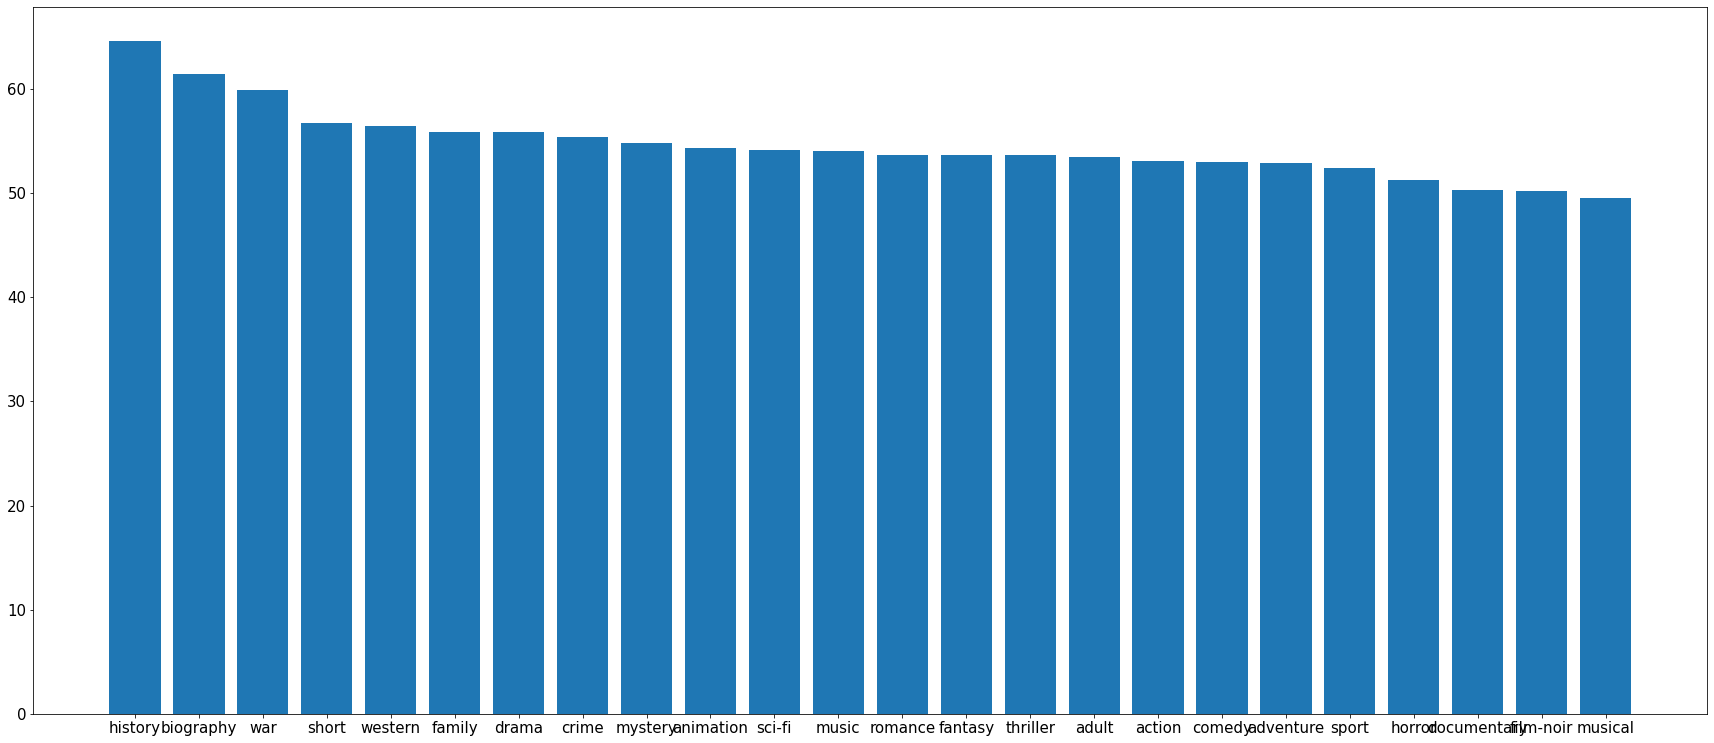

In [102]:
# sort a dictionary by value and plot the key-value pairs in reverse order
sorted_items = sorted(mean_movie_dialogueLength.items(), key=lambda x: x[1])
keys, values = zip(*sorted_items)  # unpack the key-value pairs into separate lists

fig = plt.figure(figsize=(30, 13))
plt.bar(keys[::-1], values[::-1])
plt.show()


* The distribution of average dialogue length v genre seemes to be pretty even and almost the same for every genre
* conclusion- not a relevant feature

###list of number of characters in each movie 

In [103]:
#dictionary storing genre(key) and number of characters in that genre/number of movies of that genre(value) 
genre_charList_dict = {}
for i in unique_values:
    
    _movieIDs = keySelect(movieID_listOfGenres_dict, i)

    count = 0
    for j in _movieIDs:
        count = count + char_meta['movie_ID'].value_counts()[j]
        
    #normalising character count by number of movies of that genre
    genre_charList_dict.update({i: count/count_genre.get(i)})

    

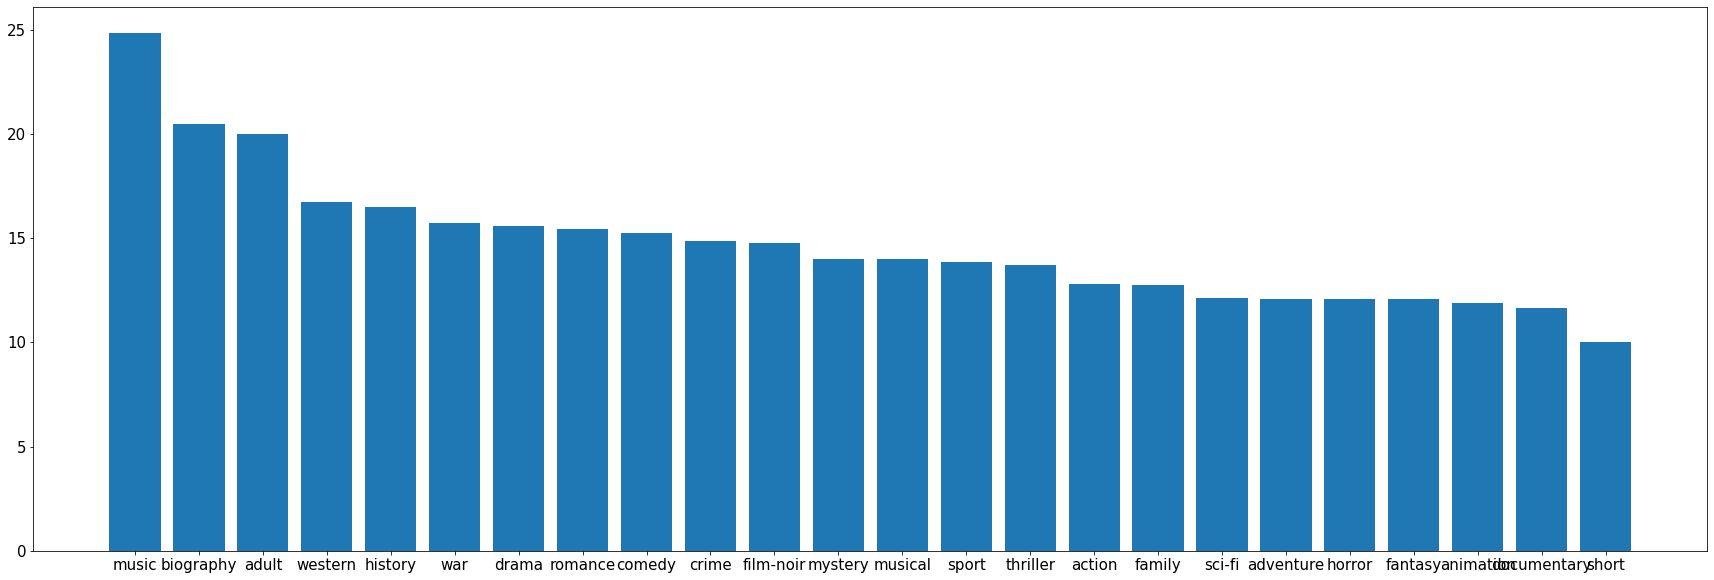

In [104]:
# sort a dictionary by value and plot the key-value pairs in reverse order
sorted_items = sorted(genre_charList_dict.items(), key=lambda x: x[1])
keys, values = zip(*sorted_items)  # unpack the key-value pairs into separate lists

fig = plt.figure(figsize=(30, 10))
plt.bar(keys[::-1], values[::-1])
plt.show()



* somwewhat of a trend here. music, biography  have a higher normalised character count
* can be used as feature 

In [105]:
#list storing number of characters in a movie(to be used as feature)
number_of_characters_list = []
for i in movie_ID:
  count = 0
  count = char_meta['movie_ID'].value_counts()[i]
  number_of_characters_list.append(count)
  

###avg word occurrence frequencies of top 10 words, verb count and noun count

In [106]:
pos_tags_to_keep = [ 'NNP', 'NNPS',  'VBG', 'VBD', 'VBN']
verbs = ['VBG', 'VBD', 'VBN']
nouns = ['NNP', 'NNPS', 'NN', 'NNS']
average_top10Freq = []
total_freq_verbs = []
total_freq_nouns = []
count = 0
for i in movie_ID:
    
    comedy_dialogue_string_list = []
    count = 0
    selected_rows = movie_lines[movie_lines['movie_ID'] == i]
    Dialogue_column_values = selected_rows['Dialogue']
    count += 1
    #Dialogue_column_values
    #Convert the series to a list of strings
    #print("test")
    comedy_dialogue_string_list = comedy_dialogue_string_list + Dialogue_column_values.tolist()
    #print("Total Movies: " + str(count))
    print(len(comedy_dialogue_string_list))
    #return comedy_dialogue_string_list
  

    #comedy_dialogue_list = listStrings_to_listLists_dialogues(comedy_dialogue_string_list)
  

    comedy_dialogue_string_list_mother = ' '.join([str(elem) for elem in comedy_dialogue_string_list])

    comedy_dialogue_string_mother_cleansed = keepValidCharacters(comedy_dialogue_string_list_mother)


    lowercase_tokens_m0_dialogue = tokeniseAndLowercasse(comedy_dialogue_string_mother_cleansed)

    #mother_lowercase_tokens_m0_dialogue = removeCustomStopwords(lowercase_tokens_m0_dialogue, custom_stopwords)


    tokens_tag = posTag(lowercase_tokens_m0_dialogue)
    #print(tokens_tag)

    filtered_words = [word for (word, pos) in tokens_tag if pos  in pos_tags_to_keep]
    #print(filtered_words)

    freq_distribution = FreqDist(filtered_words)

    top10_freq = dict(freq_distribution.most_common(10))

    total_top10_freq = sum(top10_freq.values())

    #the average top 10 frequencies
    average_top10Freq.append(total_top10_freq / len(top10_freq))

    #to find verb occurrences in a movie:
    
    filtered_words_verbs = [word for (word, pos) in tokens_tag if pos in verbs]

    freq_distribution_verbs = FreqDist(filtered_words_verbs)
    
    total_freq_verbs.append((sum(freq_distribution_verbs.values()))/movie_dialogue_count_list[count])


    #to find noun occurrences in a movie:
    
    filtered_words_nouns = [word for (word, pos) in tokens_tag if pos in nouns]

    freq_distribution_nouns = FreqDist(filtered_words_nouns)
    
    total_freq_nouns.append((sum(freq_distribution_nouns.values()))/movie_dialogue_count_list[count])


    count = count+1
    

    


669
273
672
272
578
421
584
155
206
212
627
368
291
236
317
359
1007
578
557
669
678
526
483
498
480
576
131
700
338
678
407
359
515
385
494
980
689
501
909
390
281
440
834
400
576
615
490
288
559
359
502
306
321
463
562
828
151
601
450
589
368
361
729
341
233
448
498
305
574
463
746
571
985
291
498
454
377
1014
832
552
261
185
1160
536
530
116
289
508
824
649
1149
303
613
554
695
97
175
347
418
364
1069
641
680
862
740
1214
749
504
413
673
327
532
715
481
252
359
261
518
777
810
655
439
430
490
654
407
683
910
546
561
462
633
512
517
273
193
438
304
122
942
798
734
383
429
543
473
378
445
263
1015
951
600
906
316
499
344
347
382
310
472
473
657
666
765
463
484
450
601
605
614
465
507
470
330
497
878
149
306
823
264
415
599
266
320
195
403
354
366
453
411
552
326
439
616
624
475
423
516
579
625
529
578
817
536
691
505
75
553
865
340
226
384
452
351
579
475
672
817
288
439
634
469
364
448
595
711
187
290
508
820
850
688
338
444
854
601
637
283
1187
657
635
375
259
1051
861
320
971
594
4

Correlation matrix  

In [107]:
#making dataframe of possible relevanat features
df1 = pandas.DataFrame({'movie_dialogue_count_list': movie_dialogue_count_list, 'sentiment': sentiment_feature, 'number_of_characters_list': number_of_characters_list, 'average_top10Freq': average_top10Freq, 'verb_frequency': total_freq_verbs,'noun_frequency': total_freq_nouns})


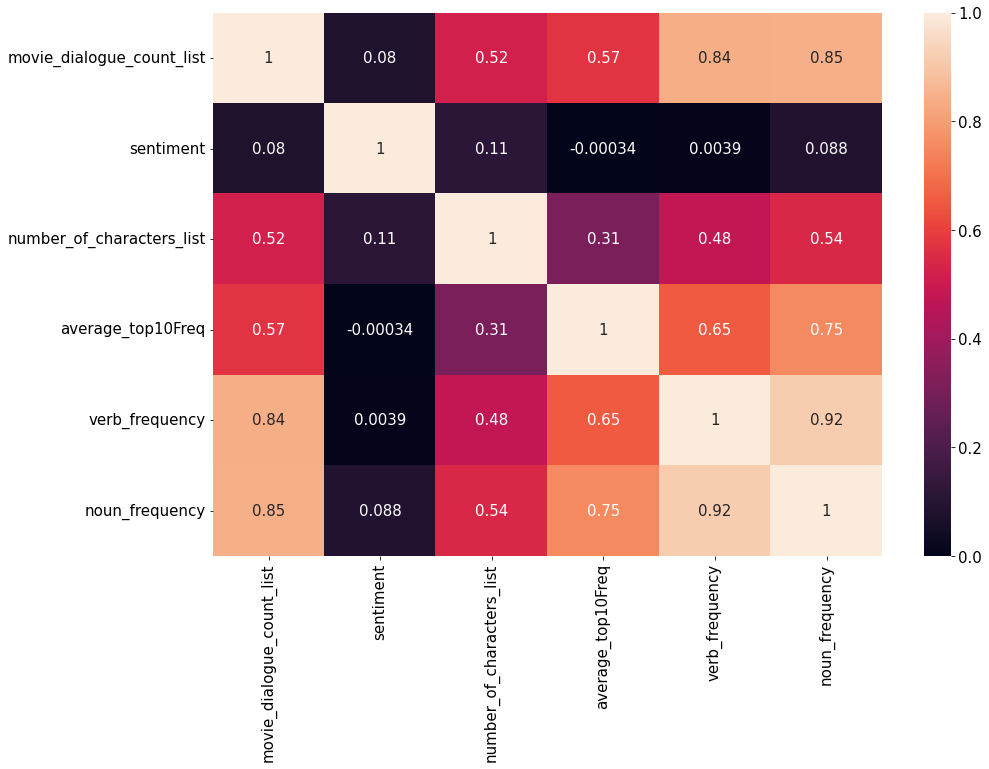

In [108]:
#plotting the correlation matrix
import seaborn as sns


corr = df1.corr()
plt.figure(figsize=(15,10))

sns.heatmap(corr, annot=True)

# Show the plot
plt.show()



* we can remove noun frequency and verb frequency as features as it is closely correlated to the movie_dialogue_count_list



#Tokenisation, lemmatisation, remvoal of stopwrods on "Dialogue" column of dataframe and putting it in a new column named "Dialogue_processed"

In [109]:
#donwloading required nltk libraries 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [110]:
#custom stopwords filter with " " as separator
def custom_tokenize(text, separator):
    tokens = []
    current_word = ""
    for character in text:
        if character == separator:
            tokens.append(current_word)
            current_word = ""
        else:
            current_word += character
    if current_word:
        tokens.append(current_word)
    return tokens


In [111]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


token_list = []

# Load the dataframe
#df = pd.read_csv("data.csv")

# Select the column that you want to process
Dialogue = movie_lines["Dialogue"].apply(str)




# Add custom stopwords to the built-in list of stopwords
stopwords_list = stopwords.words("english") + custom_stopwords

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to process the text
def process_text(text):

    invalid_chars = ".?!,\'"

    # Initialize an empty result string
    dialogue_string_mother_cleansed = ""
    # Iterate through the characters in the string
    for c in text:
        # If the character is in the valid_chars string, append it to the result
        if c not in invalid_chars:
            dialogue_string_mother_cleansed += c

    #print(comedy_dialogue_string_mother_cleansed)


    # Split the string into a list of words
    words = dialogue_string_mother_cleansed.split()
    #print(words)
    
    # Remove two-letter words
    words = [word for word in words if len(word) > 2]
    
    # Join the list of words back into a string
    words1 =  ' '.join(words)



    # Tokenize the text
    tokens = nltk.word_tokenize(words1)

    
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]



      

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Lowercase the tokens
    lowercased_tokens = [token.lower() for token in lemmatized_tokens]
    
    # Join the tokens back into a single string
    processed_text = " ".join(lowercased_tokens)
    
    return processed_text

# Process the text_column
movie_lines["Dialogue_processed"] = Dialogue.apply(process_text)


#for loop to remove other misc stopwords
for index, value in movie_lines['Dialogue_processed'].iteritems():
    # remove commas from the value
    new_value = value.replace('"',"").replace("'","").replace("``","").strip()
    # assign the new value to the row
    movie_lines.at[index, 'Dialogue_processed'] = new_value




#Converting the 'dialogue_processed' column to a list of strings

In [112]:
comedy_dialogue_string_list = []
count = 0
list_of_documents = []

for index in movie_ID:
    selected_rows = movie_lines[movie_lines['movie_ID'] == index]

    
    Dialogue_column_values = selected_rows['Dialogue_processed']
    

    # Display the selected rows
    Dialogue_column_values_list = Dialogue_column_values.tolist()

    Dialogue_column_values_list = [x for x in Dialogue_column_values_list if x != '']




    count += 1
    

    comedy_dialogue_list = []
    

    list_of_documents.append(' '.join([str(elem) for elem in Dialogue_column_values_list]))


    

In [113]:

from sklearn.feature_extraction.text import CountVectorizer


#combining NLP features discussed under "possible features" and countVectorised bag of words features 

In [114]:
#make dataframe combining the NLP features 
df = pandas.DataFrame({'movie_dialogue_count_list': movie_dialogue_count_list, 'sentiment': sentiment_feature, 'number_of_characters_list': number_of_characters_list, 'average_top10Freq': average_top10Freq})

##performing dimensionality reduction to vector_BOW, combining with df 

In [115]:
from sklearn.decomposition import PCA
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

BOW_mother = vectorizer.fit_transform(list_of_documents)



# apply PCA to the  matrix
pca = PCA(n_components=10) #components = 10 found by making scree plot which basically tells how many components to retain
#pca reduced countvectorised matrix
BOW_mother_pca = pca.fit_transform(BOW_mother.todense())



# combine the PCA-transformed Tfidf matrix with the other features
reshaped_df = np.reshape(df.astype(float), (617,4))
reshaped_Xtrain = np.reshape(BOW_mother_pca.astype(float), (617,10))

X_train_combined = np.hstack((reshaped_df, reshaped_Xtrain))

print(X_train_combined.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(617, 14)


#Logistic regression(OnevRest)

In [116]:
x = vectorizer.fit_transform(list_of_documents)
#xval_vect = vectorizer.fit_transform(xval)

In [117]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
#using multilabel binariser binary encode target variables i.e. labels
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(genre_list)

# transform target variable
y = multilabel_binarizer.transform(genre_list)

#splitting dataset
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, random_state=9)



In [118]:
lr = LogisticRegression(max_iter=1000,penalty='l2') #using l2 regularisation to prevent overfitting (large no of features compared to the dataset size)
clf = OneVsRestClassifier(lr) #using logisitic regression as wrapper method

In [119]:
# fit model on train data
clf.fit(xtrain, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [120]:
# make predictions for validation set
y_pred = clf.predict(xval)

##Metric for judgement



* For our use case, it's better to have a higher precision and lower recall  than a higher recall and lower precision. A high precision would mean that the classifier is not misclassifying a movie as a genre it's not, which is desirable in order to avoid confusion

* A high recall may come at the cost of a lower precision, meaning that the classifier might classify some movies as genres they don't belong to.



In [121]:
# evaluate performance
f1_score(yval, y_pred, average="weighted")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.47879653746445544

In [122]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval)


In [123]:
#t = 0.3 # threshold value
#y_pred_new = (y_pred_prob >= t).astype(int)

In [124]:
# evaluate performance
#f1_score(yval, y_pred_new, average="weighted")

* NOTE: The F1 score is particularly useful when the distribution of classes in the dataset is imbalanced, as it takes into account both false positives and false negatives.


In [125]:
from sklearn.metrics import classification_report

#label_names = ['label A', 'label B', 'label C', 'label D']

print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.33      0.44        36
           2       0.00      0.00      0.00         0
           3       0.50      0.12      0.19        26
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       0.65      0.59      0.62        29
           7       0.68      0.60      0.64        25
           8       0.00      0.00      0.00         0
           9       0.69      0.63      0.66        63
          10       0.00      0.00      0.00         1
          11       0.50      0.12      0.19        17
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.57      0.21      0.31        19
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.86    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* there are about 14 labels for which the true positives are 0. Can consider removing them from the classification altogether to achieve better performance for a smaller label set. Will try implementing a model with for genres encompassing 90% of the data in the upcoming code cells

#Random forest classifier

* random forest is an ensemble method which has multiple decision trees predicting the labels. Using a random forest classifier helps prevent overfitting by just one decision tree and uses the most voted label by the decision trees to predict the label

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier()

# Wrap the classifier in a MultiOutputClassifier
multi_clf = MultiOutputClassifier(clf)

# Fit the multi-label classifier on the training data
multi_clf.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = multi_clf.predict(xval)


In [127]:
f1_score(yval, y_pred, average="weighted")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.23981017936437118

In [128]:
from sklearn.metrics import classification_report

#label_names = ['label A', 'label B', 'label C', 'label D']

print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.06      0.11        36
           2       0.00      0.00      0.00         0
           3       1.00      0.04      0.07        26
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        29
           7       1.00      0.04      0.08        25
           8       0.00      0.00      0.00         0
           9       0.68      0.76      0.72        63
          10       0.00      0.00      0.00         1
          11       1.00      0.06      0.11        17
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        19
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# We now implement the 2 models(log regression and random forest) for count vectorised bag of words for only a select few genre. genres that have enough instances to train the model and predict em


* As mentioned before in the graph shown below (the plot of frequency of occurences of genres), it shows that drama, thriller, action, comedy, crime, romance, sci-fi, adventure, mystery, horror, fantasy encompasses 91%(approx) of the data

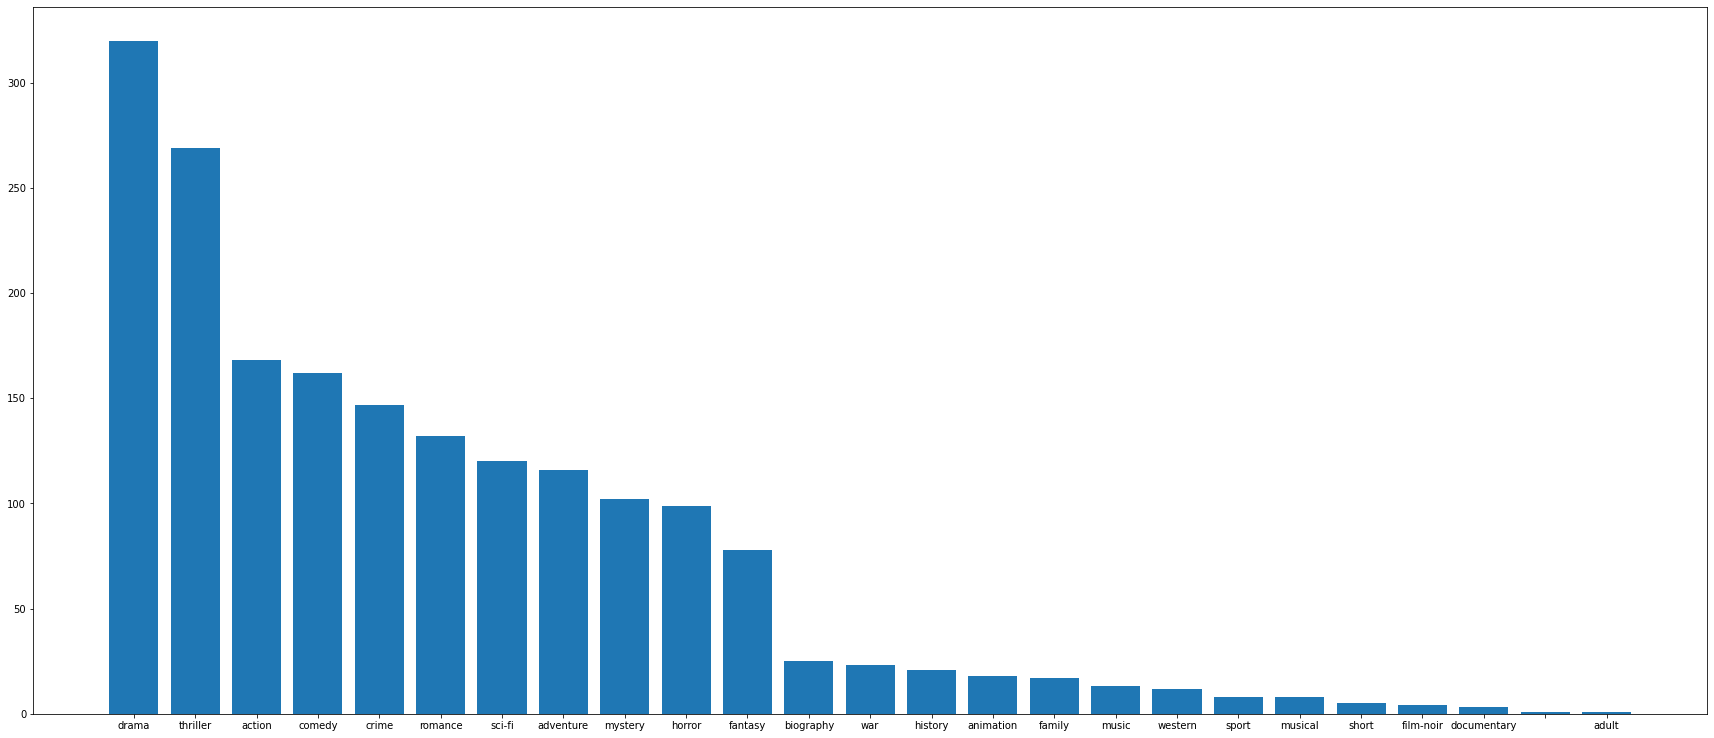



So, now we build our top two models for these 11(n) genres

###Tokenisation, lemmatisation, remvoal of stopwords on "Dialogue" column of dataframe and putting it in a new dataframe in a column named "Dialogue_processed"

In [129]:
#new list of genres which covers 91% of the instances in the entire dataset
new_genre_list = ['drama', 'thriller', 'action', 'comedy', 'crime', 'romance', 'sci-fi', 'adventure', 'mystery', 'horror', 'fantasy']

In [130]:
matching_rows = movie_titles_meta[movie_titles_meta['list_of_genres'].apply(lambda x: any(i in x for i in new_genre_list))]
movie_ID_select_genre = matching_rows['movie_ID'].unique()
movie_ID_select_genre

array(['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
       'm11', 'm12', 'm13', 'm14', 'm15', 'm16', 'm17', 'm18', 'm19',
       'm20', 'm21', 'm22', 'm23', 'm24', 'm25', 'm26', 'm27', 'm28',
       'm29', 'm30', 'm31', 'm32', 'm33', 'm34', 'm35', 'm36', 'm37',
       'm38', 'm39', 'm40', 'm41', 'm42', 'm43', 'm44', 'm45', 'm46',
       'm47', 'm48', 'm49', 'm50', 'm51', 'm52', 'm53', 'm54', 'm55',
       'm56', 'm57', 'm58', 'm59', 'm60', 'm61', 'm62', 'm63', 'm64',
       'm65', 'm66', 'm67', 'm68', 'm69', 'm70', 'm71', 'm72', 'm73',
       'm74', 'm75', 'm76', 'm77', 'm78', 'm79', 'm80', 'm81', 'm82',
       'm83', 'm84', 'm85', 'm86', 'm87', 'm88', 'm89', 'm90', 'm91',
       'm92', 'm93', 'm94', 'm95', 'm96', 'm97', 'm98', 'm99', 'm100',
       'm101', 'm102', 'm103', 'm104', 'm105', 'm106', 'm107', 'm108',
       'm109', 'm110', 'm111', 'm112', 'm113', 'm114', 'm116', 'm117',
       'm118', 'm119', 'm120', 'm121', 'm122', 'm123', 'm124', 'm125',
       'm126

In [131]:
interim_genre11_df = movie_titles_meta[movie_titles_meta['list_of_genres'].apply(lambda x: any(i in x for i in new_genre_list))]

In [132]:
genres_11_pandas_series = interim_genre11_df['list_of_genres']
genres_11_list = list(genres_11_pandas_series)
genres_11_list

[" ['comedy', 'romance']",
 " ['adventure', 'biography', 'drama', 'history']",
 " ['action', 'crime', 'drama', 'thriller']",
 " ['adventure', 'mystery', 'sci-fi']",
 " ['action', 'comedy', 'crime', 'drama', 'thriller']",
 " ['action', 'adventure', 'romance', 'sci-fi', 'thriller']",
 " ['crime', 'mystery', 'thriller']",
 " ['fantasy', 'horror', 'thriller']",
 " ['fantasy', 'horror', 'thriller']",
 " ['sci-fi', 'thriller']",
 " ['drama', 'mystery', 'thriller']",
 " ['action', 'drama', 'thriller']",
 " ['comedy', 'romance', 'sci-fi']",
 " ['comedy', 'romance']",
 " ['crime', 'drama', 'sci-fi', 'thriller']",
 " ['action', 'sci-fi', 'thriller']",
 " ['biography', 'drama', 'music']",
 " ['horror', 'romance']",
 " ['drama']",
 " ['action', 'western']",
 " ['drama', 'thriller']",
 " ['drama', 'thriller']",
 " ['action', 'adventure', 'comedy', 'crime']",
 " ['action', 'adventure', 'thriller']",
 " ['comedy', 'romance']",
 " ['action', 'crime', 'drama', 'mystery', 'thriller']",
 " ['crime', 'dra

In [133]:
#initialising list to store genres list(target variable) in
genres_11_list_final = []
for index in range(len(genres_11_list)):
      row = genres_11_list[index].replace('" ',"").replace('"',"").replace("'", '').replace("[","").replace("]","").strip()
      genres_11_list_final.append(row.split(", "))
print(genres_11_list_final)

[['comedy', 'romance'], ['adventure', 'biography', 'drama', 'history'], ['action', 'crime', 'drama', 'thriller'], ['adventure', 'mystery', 'sci-fi'], ['action', 'comedy', 'crime', 'drama', 'thriller'], ['action', 'adventure', 'romance', 'sci-fi', 'thriller'], ['crime', 'mystery', 'thriller'], ['fantasy', 'horror', 'thriller'], ['fantasy', 'horror', 'thriller'], ['sci-fi', 'thriller'], ['drama', 'mystery', 'thriller'], ['action', 'drama', 'thriller'], ['comedy', 'romance', 'sci-fi'], ['comedy', 'romance'], ['crime', 'drama', 'sci-fi', 'thriller'], ['action', 'sci-fi', 'thriller'], ['biography', 'drama', 'music'], ['horror', 'romance'], ['drama'], ['action', 'western'], ['drama', 'thriller'], ['drama', 'thriller'], ['action', 'adventure', 'comedy', 'crime'], ['action', 'adventure', 'thriller'], ['comedy', 'romance'], ['action', 'crime', 'drama', 'mystery', 'thriller'], ['crime', 'drama'], ['comedy', 'drama', 'music'], ['drama', 'romance', 'war'], ['crime', 'drama', 'mystery', 'thriller']

In [134]:
interim = movie_lines.loc[movie_lines['movie_ID'].isin(movie_ID_select_genre)]

# Select the desired column 'C' from matching rows
result = interim['Dialogue']

print(result)

0                                              They do not!
1                                               They do to!
2                                                I hope so.
3                                                 She okay?
4                                                 Let's go.
                                ...                        
304708     Lord Chelmsford seems to want me to stay back...
304709     I'm to take the Sikali with the main column t...
304710                             Your orders, Mr Vereker?
304711     Good ones, yes, Mr Vereker. Gentlemen who can...
304712     Colonel Durnford... William Vereker. I hear y...
Name: Dialogue, Length: 302600, dtype: object


In [135]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


token_list = []

# Load the dataframe
#df = pd.read_csv("data.csv")

# Select the column that you want to process
matching_rows = movie_titles_meta[movie_titles_meta['list_of_genres'].apply(lambda x: any(i in x for i in new_genre_list))]
movie_ID_select_genre = matching_rows['movie_ID'].unique()
movie_ID_select_genre

interim = movie_lines.loc[movie_lines['movie_ID'].isin(movie_ID_select_genre)]

# Select the desired column 'C' from matching rows
result = interim['Dialogue'].apply(str)

#print(result)



# Add custom stopwords to the built-in list of stopwords
stopwords_list = stopwords.words("english") + custom_stopwords

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to process the text
def process_text(text):

    invalid_chars = ".?!,\'"

    # Initialize an empty result string
    dialogue_string_mother_cleansed = ""
    # Iterate through the characters in the string
    for c in text:
        # If the character is in the valid_chars string, append it to the result
        if c not in invalid_chars:
            dialogue_string_mother_cleansed += c

    #print(comedy_dialogue_string_mother_cleansed)


    # Split the string into a list of words
    words = dialogue_string_mother_cleansed.split()
    #print(words)
    
    # Remove two-letter words
    words = [word for word in words if len(word) > 2]
    
    # Join the list of words back into a string
    words1 =  ' '.join(words)



    # Tokenize the text
    tokens = nltk.word_tokenize(words1)

    
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]





    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Lowercase the tokens
    lowercased_tokens = [token.lower() for token in lemmatized_tokens]
    
    # Join the tokens back into a single string
    processed_text = " ".join(lowercased_tokens)
    
    return processed_text

# Process the text_column
#movie_lines["Dialogue_processed"] = result.apply(process_text)
new_df_genre_dialogues = result.to_frame()
new_df_genre_dialogues["Dialogue_processed"] = result.apply(process_text)




#for loop to remove other misc stopwords
for index, value in new_df_genre_dialogues['Dialogue_processed'].iteritems():
    # remove commas from the value
    new_value = value.replace('"',"").replace("'","").replace("``","").strip()
    # assign the new value to the row
    new_df_genre_dialogues.at[index, 'Dialogue_processed'] = new_value




###Converting the 'dialogue_processed' column to a list of strings

In [136]:
comedy_dialogue_string_list = []
count = 0
list_of_documents_11genres = []

for index in movie_ID_select_genre:
    selected_rows = movie_lines[movie_lines['movie_ID'] == index]

    
    Dialogue_column_values = selected_rows['Dialogue_processed']
    

    # Display the selected rows
    Dialogue_column_values_list = Dialogue_column_values.tolist()

    Dialogue_column_values_list = [x for x in Dialogue_column_values_list if x != '']




    count += 1
    

    comedy_dialogue_list = []
    

    list_of_documents_11genres.append(' '.join([str(elem) for elem in Dialogue_column_values_list]))


    

In [137]:
x_11genre = vectorizer.fit_transform(list_of_documents_11genres)

###Logistic regression(OnevRest)(for 11 genres)

In [138]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
#using multilabel binariser binary encode target variables i.e. labels
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(genres_11_list_final)

# transform target variable
y_11genre = multilabel_binarizer.transform(genres_11_list_final)

#splitting dataset
xtrain, xval, ytrain, yval = train_test_split(x_11genre, y_11genre, test_size=0.2, random_state=9)



In [139]:
lr = LogisticRegression(max_iter=1000,penalty='l2') #using l2 regularisation to prevent overfitting (large no of features compared to the dataset size)
clf = OneVsRestClassifier(lr) #using logisitic regression as wrapper method

In [140]:
# fit model on train data
clf.fit(xtrain, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [141]:
# make predictions for validation set
y_pred = clf.predict(xval)

In [142]:
# evaluate performance
f1_score(yval, y_pred, average="weighted")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.46762468341217206

In [143]:
from sklearn.metrics import classification_report

#label_names = ['label A', 'label B', 'label C', 'label D']

print(classification_report(yval, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.32      0.41        38
           1       0.00      0.00      0.00         0
           2       0.53      0.36      0.43        22
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.62      0.41      0.49        37
           6       0.75      0.60      0.67        25
           7       0.69      0.68      0.68        65
           8       0.00      0.00      0.00         4
           9       0.40      0.11      0.17        19
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.67      0.32      0.43        19
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          15       0.50      0.14      0.21        22
          16       0.42      0.31      0.36        32
          17       0.75    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Random forest classifier(for 11 genres)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier()

# Wrap the classifier in a MultiOutputClassifier
multi_clf = MultiOutputClassifier(clf)

# Fit the multi-label classifier on the training data
multi_clf.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = multi_clf.predict(xval)


In [145]:
f1_score(yval, y_pred, average="weighted")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.23211816511111213

* the models perform worse(both in terms of f1-score and precision) than when the target variable set had all the genres(i.e. 25) 
* could be because the instances for the target variables ie genres that were removed were really good training instances(though very few in number). Cannot confirm this though

#Conclusion

* Random forest classifier performs worse than onevsrest logistic regression model (in terms of f1 score) becuase of the data imbalance. random forest classifier is insensitive to class imbalance. But that being said, the random forest classifier has higher micro-average precision than onevrest logistic regression classifier.

* A good balance between f1 score and accuracy is shown by OneVRest with only countVectorised bag of words as features. Though Random forest classifier has the best precision(that being the priority), the recall is horrible and there is no balance(even somewhat) between the precision and recall.

* Tried implementation with vectorised words along with the 'df' features for the models but seemed to perform worse( in terms of f1 score, hamming loss and showed lower micro averaged precision.This is because of the model overfitting due to many features

* Best case seems to be - OnevRest with Logistic regression wrapper with only vectorised words as features 

#Future scope

> * Do an encoder-decoder network for classification as a deep learning implementation of the problem
> * Analyse the skewed data more thoroughly and have a thorough look at the instances for the target variables that were removed.

